### Problem Statement - ML Project - Coded
### Problem 1

### Context
CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

### Objective
The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

### Data Description
vote: Party choice: Conservative or Labour
age: in years
economic.cond.national: Assessment of current national economic conditions, 1 to 5.
economic.cond.household: Assessment of current household economic conditions, 1 to 5.
Blair: Assessment of the Labour leader, 1 to 5.
Hague: Assessment of the Conservative leader, 1 to 5.
Europe: an 11-point scale that measures respondents' attitudes toward European integration.   High scores represent ‘Eurosceptic’ sentiment.
political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
gender: female or male.                         

### Define the problem and perform Exploratory Data Analysis
- Problem definition - Check shape, Data types, and statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

### Upload Required Libraries

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.metrics import roc_curve,classification_report
from sklearn.metrics import roc_auc_score,confusion_matrix
import warnings 
warnings.filterwarnings( "ignore")
import matplotlib
import sklearn

In [2]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('scikit-learn version:', sklearn.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.24.3
Pandas version: 1.5.3
scikit-learn version: 1.3.0
Matplotlib version: 3.7.1


### Importing data

In [3]:
election=pd.read_excel("Election_Data.xlsx")

In [4]:

election.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

### EDA

### Shape

In [5]:
# Shape of the dataframe
print("no. of rows: ",election.shape[0], "\n""no. of columns: ",election.shape[1])

no. of rows:  1525 
no. of columns:  10


### Data type of data features

In [6]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


### Null value Check

In [7]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
election.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

Droping "Unnamed" as it is insignificant

In [8]:
election.drop("Unnamed: 0",axis=1,inplace =True)

In [9]:
election.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

we need some summary statistics of our dataframe. For this, we can use describe() method. It can be used to generate various summary statistics.

In [10]:
election.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1525.0  54.182295  15.711209  24.0  41.0  53.0  67.0   
economic.cond.national   1525.0   3.245902   0.880969   1.0   3.0   3.0   4.0   
economic.cond.household  1525.0   3.140328   0.929951   1.0   3.0   3.0   4.0   
Blair                    1525.0   3.334426   1.174824   1.0   2.0   4.0   4.0   
Hague                    1525.0   2.746885   1.230703   1.0   2.0   2.0   4.0   
Europe                   1525.0   6.728525   3.297538   1.0   4.0   6.0  10.0   
political.knowledge      1525.0   1.542295   1.083315   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

In [11]:
cat=['vote',"gender"]
num =[x for x in election.columns if x not in cat] # list comprehension

print(cat)
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


### Printing Categorical Values with their Counts


In [12]:
for catvar in cat:
    print(catvar,'  No of Levels:',election[catvar].nunique())
    print(election[catvar].value_counts())
    print('\n\n')

vote   No of Levels: 2
Labour          1063
Conservative     462
Name: vote, dtype: int64



gender   No of Levels: 2
female    812
male      713
Name: gender, dtype: int64





### Check for Null Values


In [13]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

No independent & Dependint features have missing values



### Checking for Duplicate Records


In [14]:
## Are there any duplicate records?

dups = election.duplicated()
dups.sum()

8

There are 8 duplicate Values present in the Dataset so we have to drop them



In [15]:
election.drop_duplicates(inplace=True) 


### Univariate Analysis

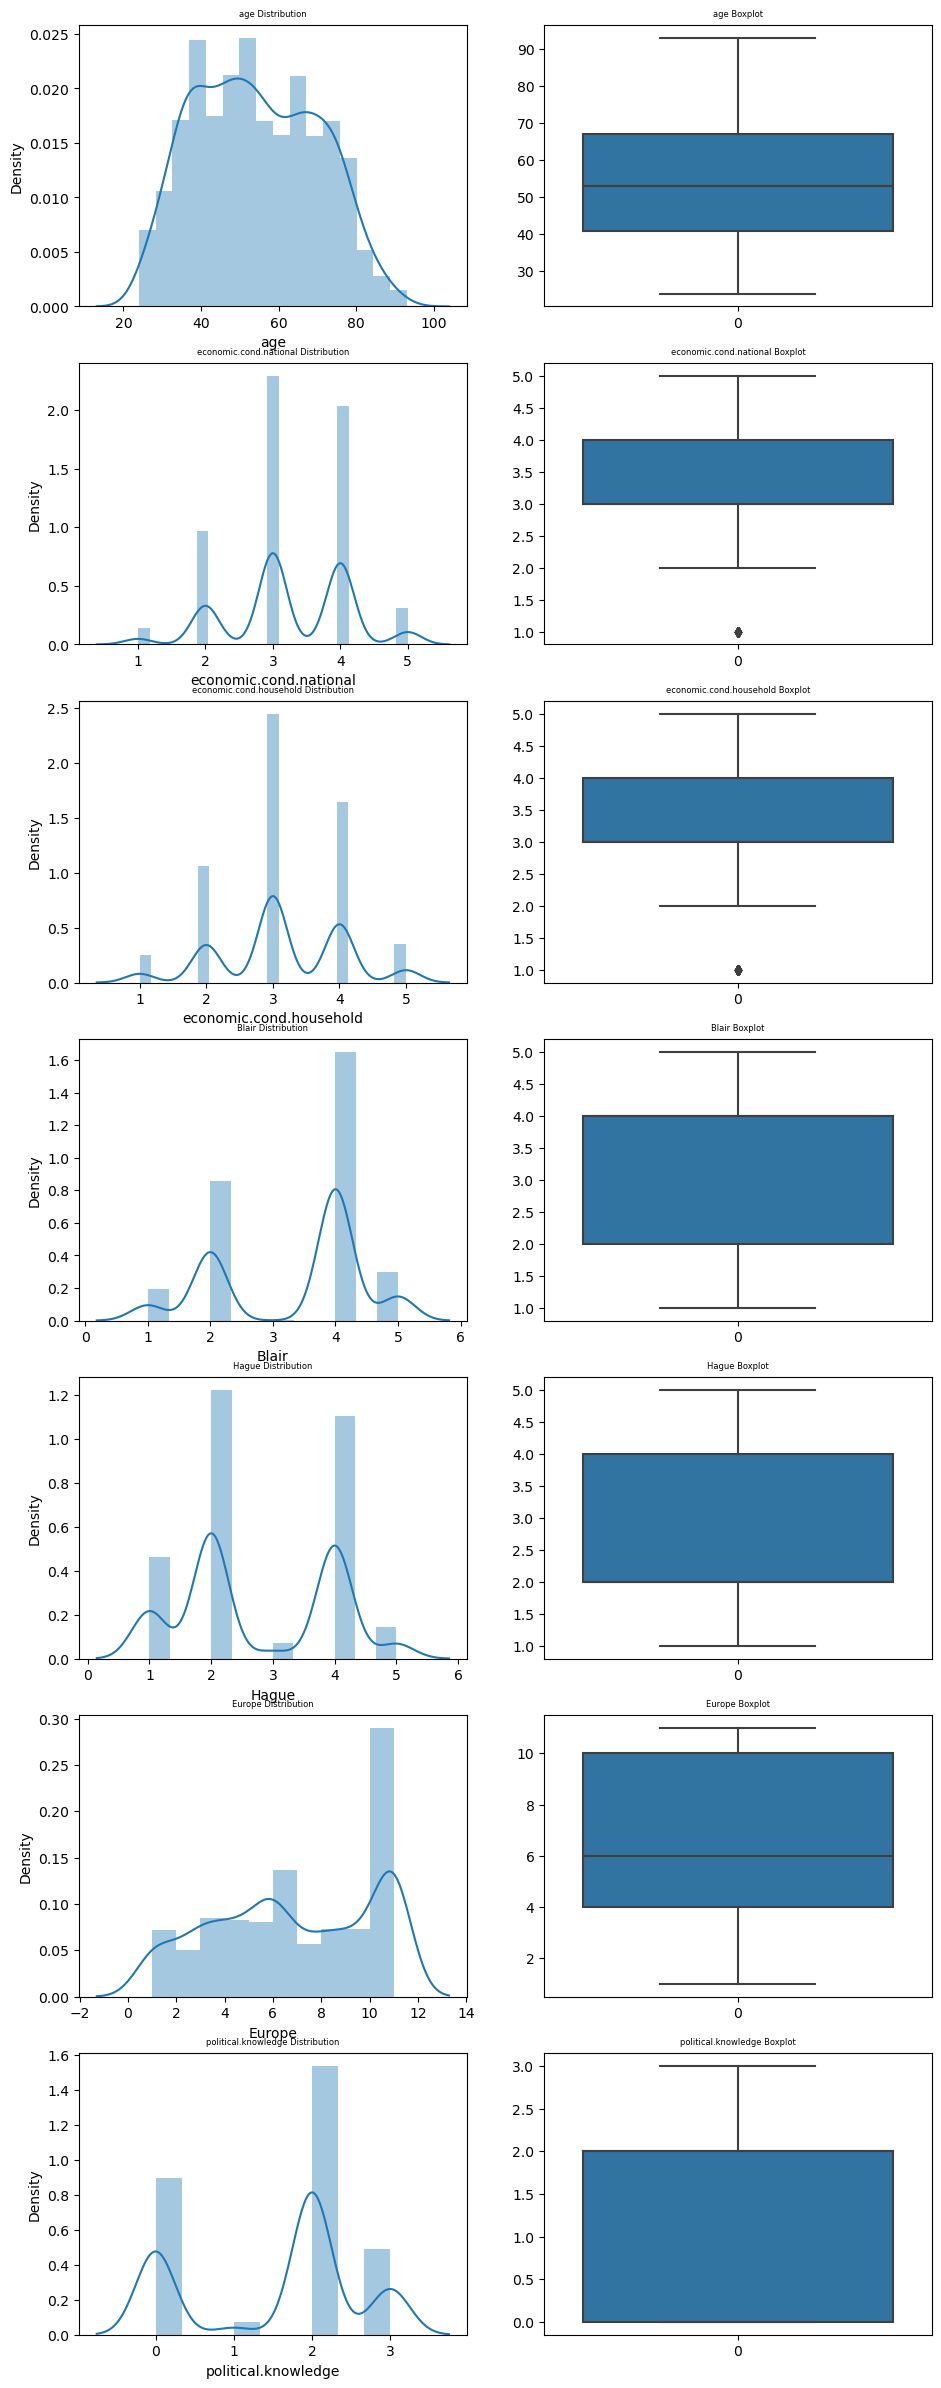

In [16]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(11,30)
a = sns.distplot(election['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=6)
 
a = sns.boxplot(election['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=6)

a = sns.distplot(election['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=6)

a = sns.boxplot(election['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=6)


a = sns.distplot(election['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=6)

a = sns.boxplot(election['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=6)


a = sns.distplot(election['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=6)

a = sns.boxplot(election['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=6)

a = sns.distplot(election['Hague'] , ax=axes[4][0])
a.set_title("Hague Distribution",fontsize=6)

a = sns.boxplot(election['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague Boxplot",fontsize=6)

a = sns.distplot(election['Europe'] , ax=axes[5][0])
a.set_title("Europe Distribution",fontsize=6)

a = sns.boxplot(election['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe Boxplot",fontsize=6)

a = sns.distplot(election['political.knowledge'] , ax=axes[6][0])
a.set_title("political.knowledge Distribution",fontsize=6)

a = sns.boxplot(election['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political.knowledge Boxplot",fontsize=6)

plt.show()

1. From the boxplots/histogram we can also see that where the chunk of the data is concentrated for each of the features
2. We can clearly see that all features are not normally distributed

In [17]:
election.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

### Bivariate and Multivariate Analysis

In [18]:
election.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

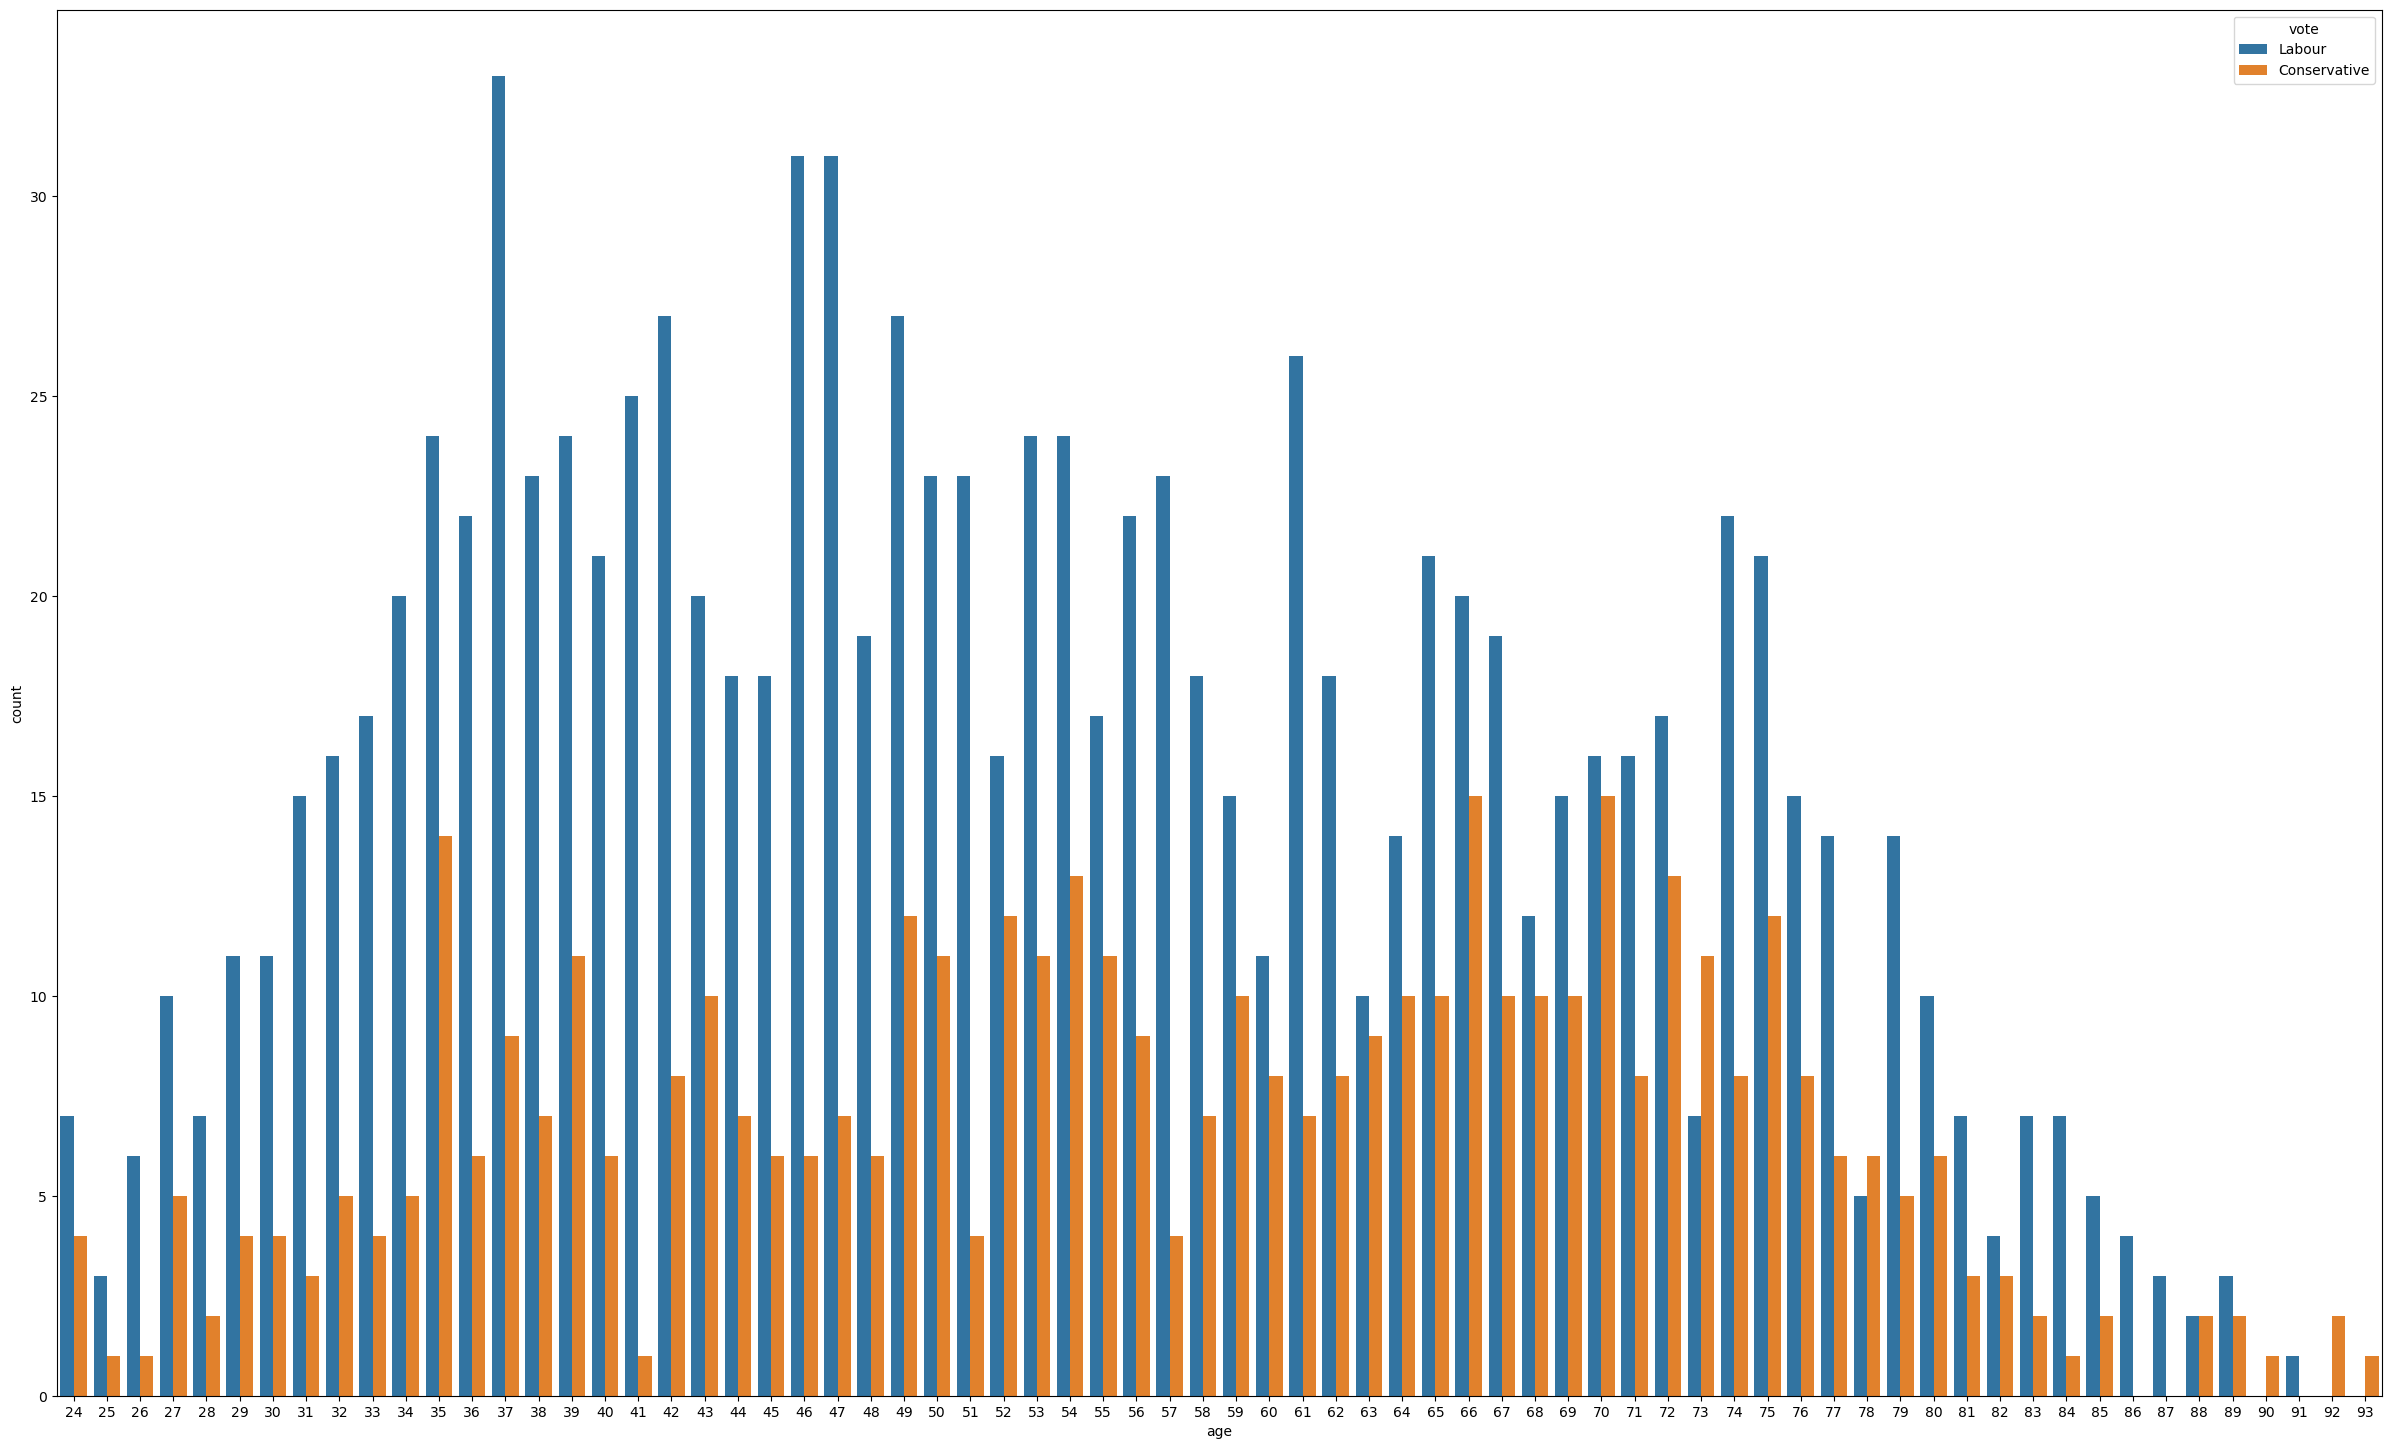

In [19]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(30, 18)
 
sns.countplot(x="age", data=election, hue='vote');

Above plot represents Labour Party is getting More Votes in each Age Group



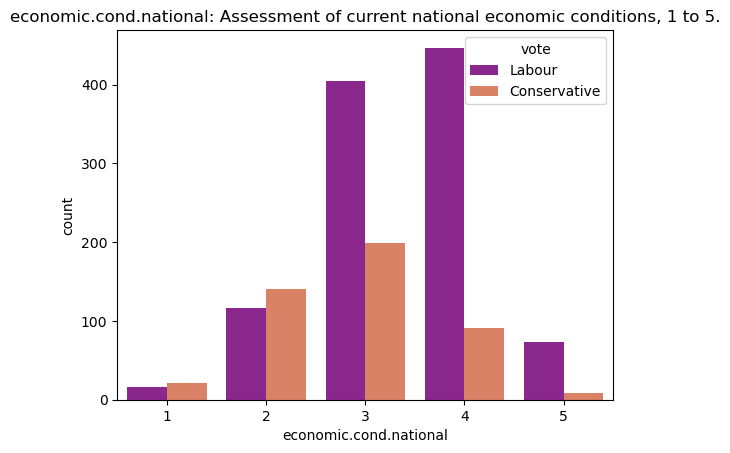

In [20]:
plt.title('economic.cond.national: Assessment of current national economic conditions, 1 to 5.')
sns.countplot(x="economic.cond.national", data=election, hue='vote',palette='plasma');

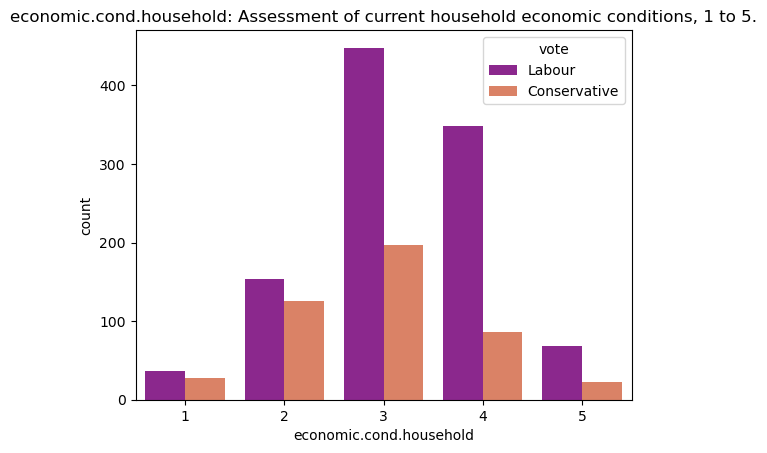

In [21]:
plt.title('economic.cond.household: Assessment of current household economic conditions, 1 to 5.')
sns.countplot(x="economic.cond.household", data=election, hue='vote',palette='plasma');

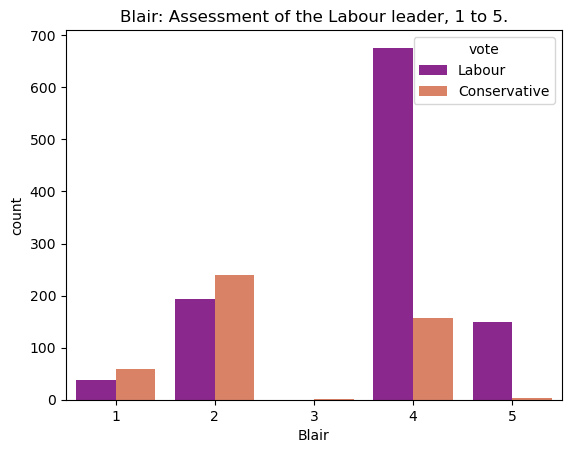

In [22]:
plt.title('Blair: Assessment of the Labour leader, 1 to 5.')
sns.countplot(x="Blair", data=election, hue='vote',palette='plasma');

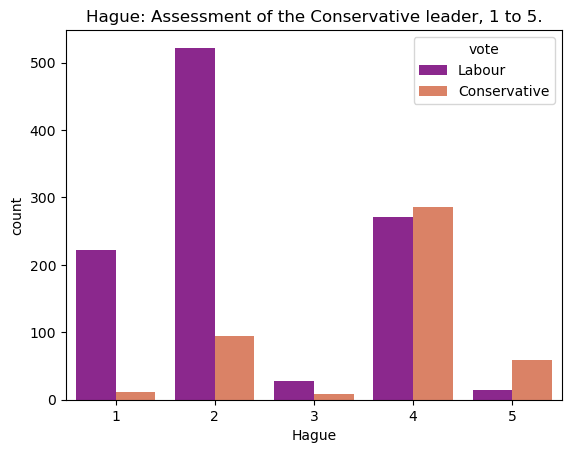

In [23]:
plt.title('Hague: Assessment of the Conservative leader, 1 to 5.')
sns.countplot(x="Hague", data=election, hue='vote',palette='plasma');

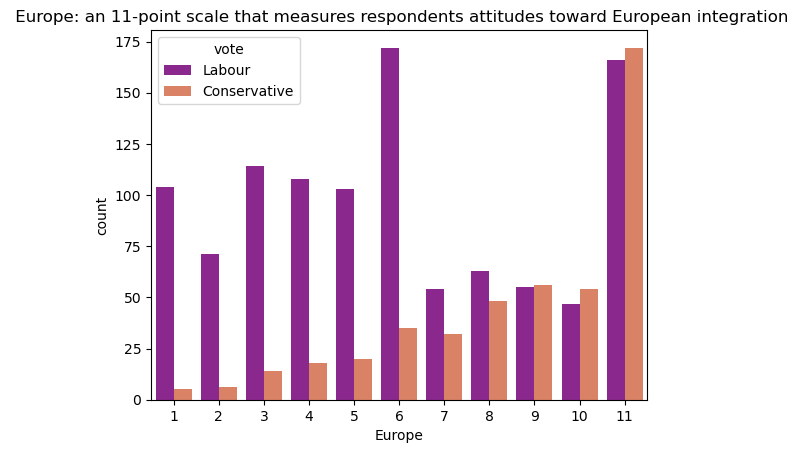

In [24]:
plt.title(' Europe: an 11-point scale that measures respondents attitudes toward European integration')
sns.countplot(x="Europe", data=election, hue='vote',palette='plasma');

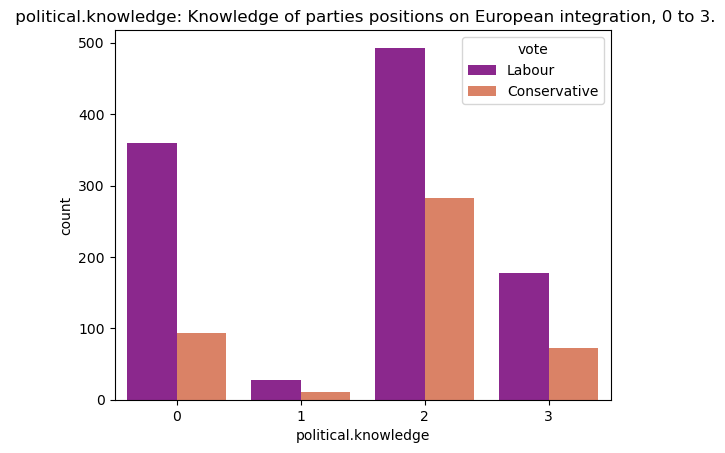

In [25]:
plt.title(' political.knowledge: Knowledge of parties positions on European integration, 0 to 3.')
sns.countplot(x="political.knowledge", data=election, hue='vote',palette='plasma');

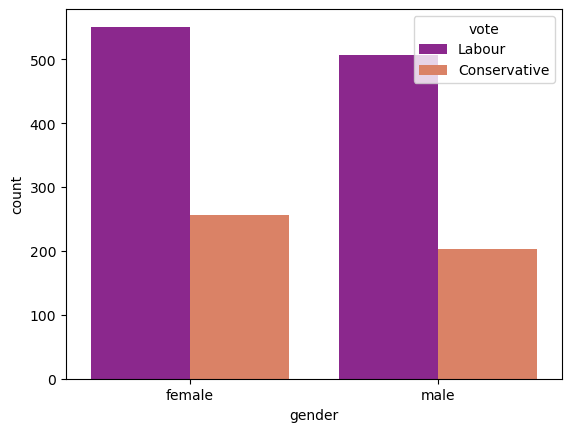

In [26]:
sns.countplot(x="gender", data=election, hue='vote',palette='plasma');

### Checking Correlation


In [27]:
election.corr()


age  economic.cond.national  \
age                      1.000000                0.018687   
economic.cond.national   0.018687                1.000000   
economic.cond.household -0.038868                0.347687   
Blair                    0.032084                0.326141   
Hague                    0.031144               -0.200790   
Europe                   0.064562               -0.209150   
political.knowledge     -0.046598               -0.023510   

                         economic.cond.household     Blair     Hague  \
age                                    -0.038868  0.032084  0.031144   
economic.cond.national                  0.347687  0.326141 -0.200790   
economic.cond.household                 1.000000  0.215822 -0.100392   
Blair                                   0.215822  1.000000 -0.243508   
Hague                                  -0.100392 -0.243508  1.000000   
Europe                                 -0.112897 -0.295944  0.285738   
political.knowledge                    -0.038528 -0.021299 -0.029906   

                           Europe  political.knowledge  
age                      0.064562            -0.046598  
economic.cond.national  -0.209150            -0.023510  
economic.cond.household -0.112897            -0.038528  
Blair                   -0.295944            -0.021299  
Hague                    0.285738            -0.029906  
Europe                   1.000000            -0.151197  
political.knowledge     -0.151197             1.000000

### Correlation Plot


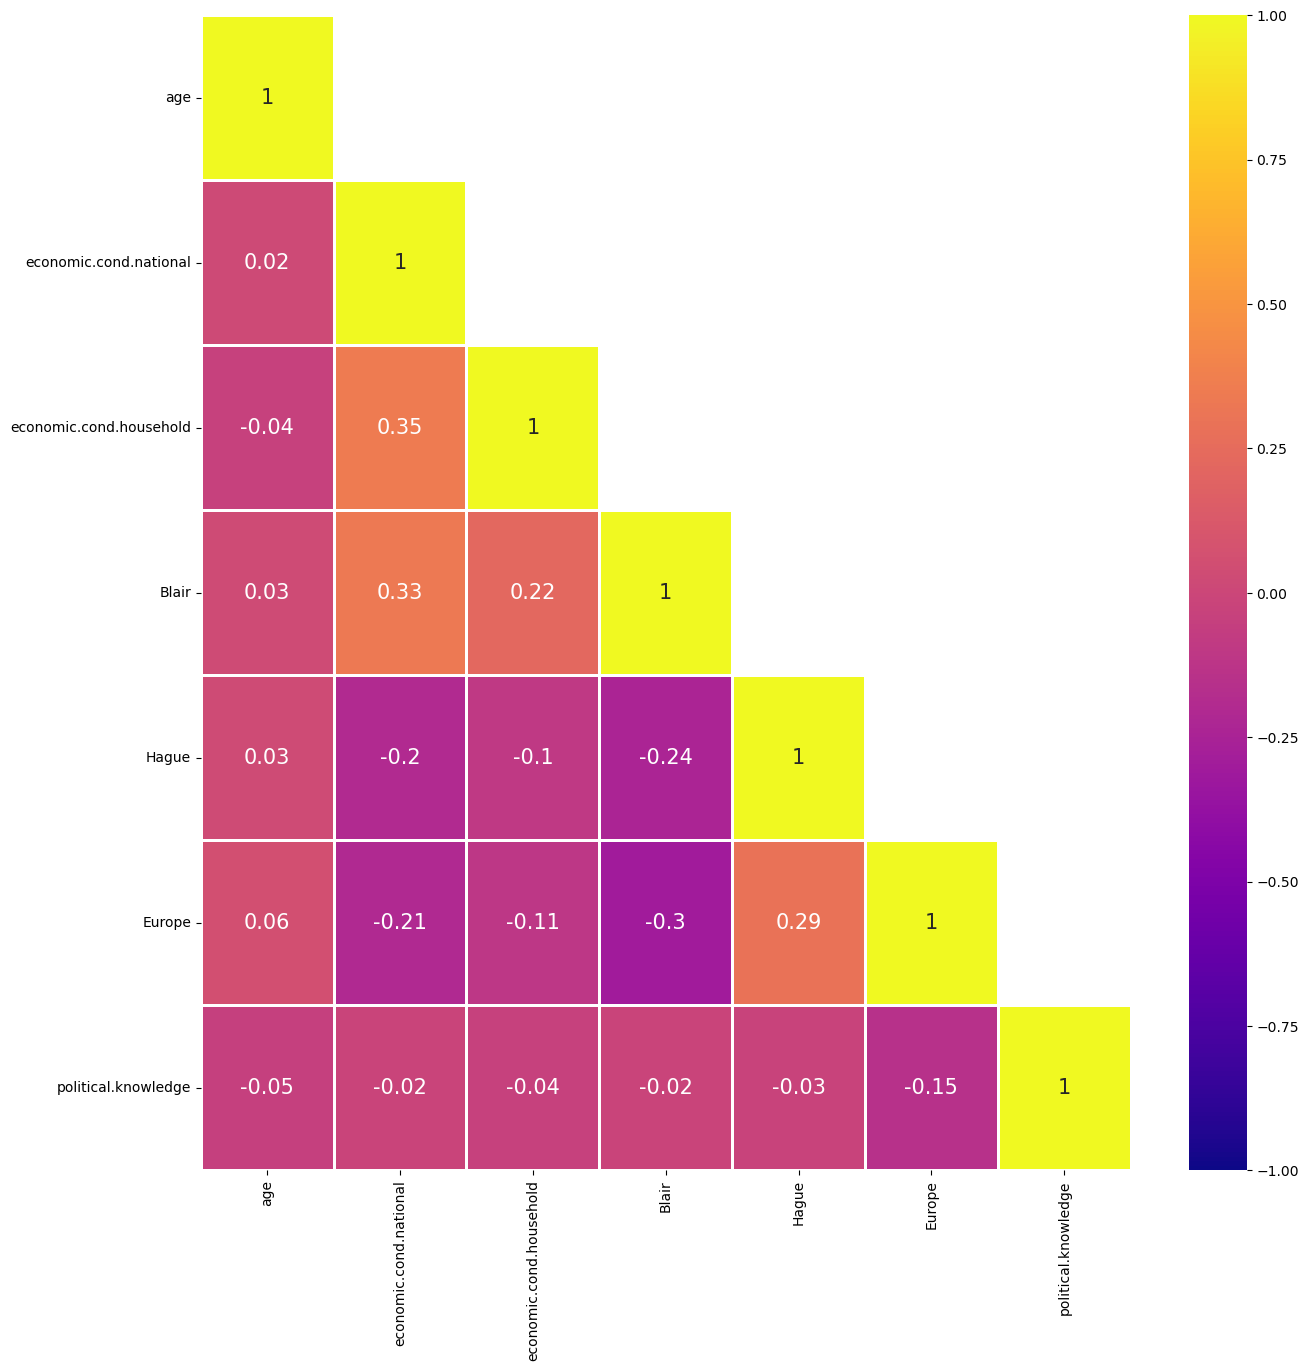

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(election.corr().round(2),annot=True, 
            mask = np.triu(np.ones_like(election.corr()),1),cmap='plasma',
           vmin =-1, vmax=1, linewidths=2, annot_kws={'size':15});

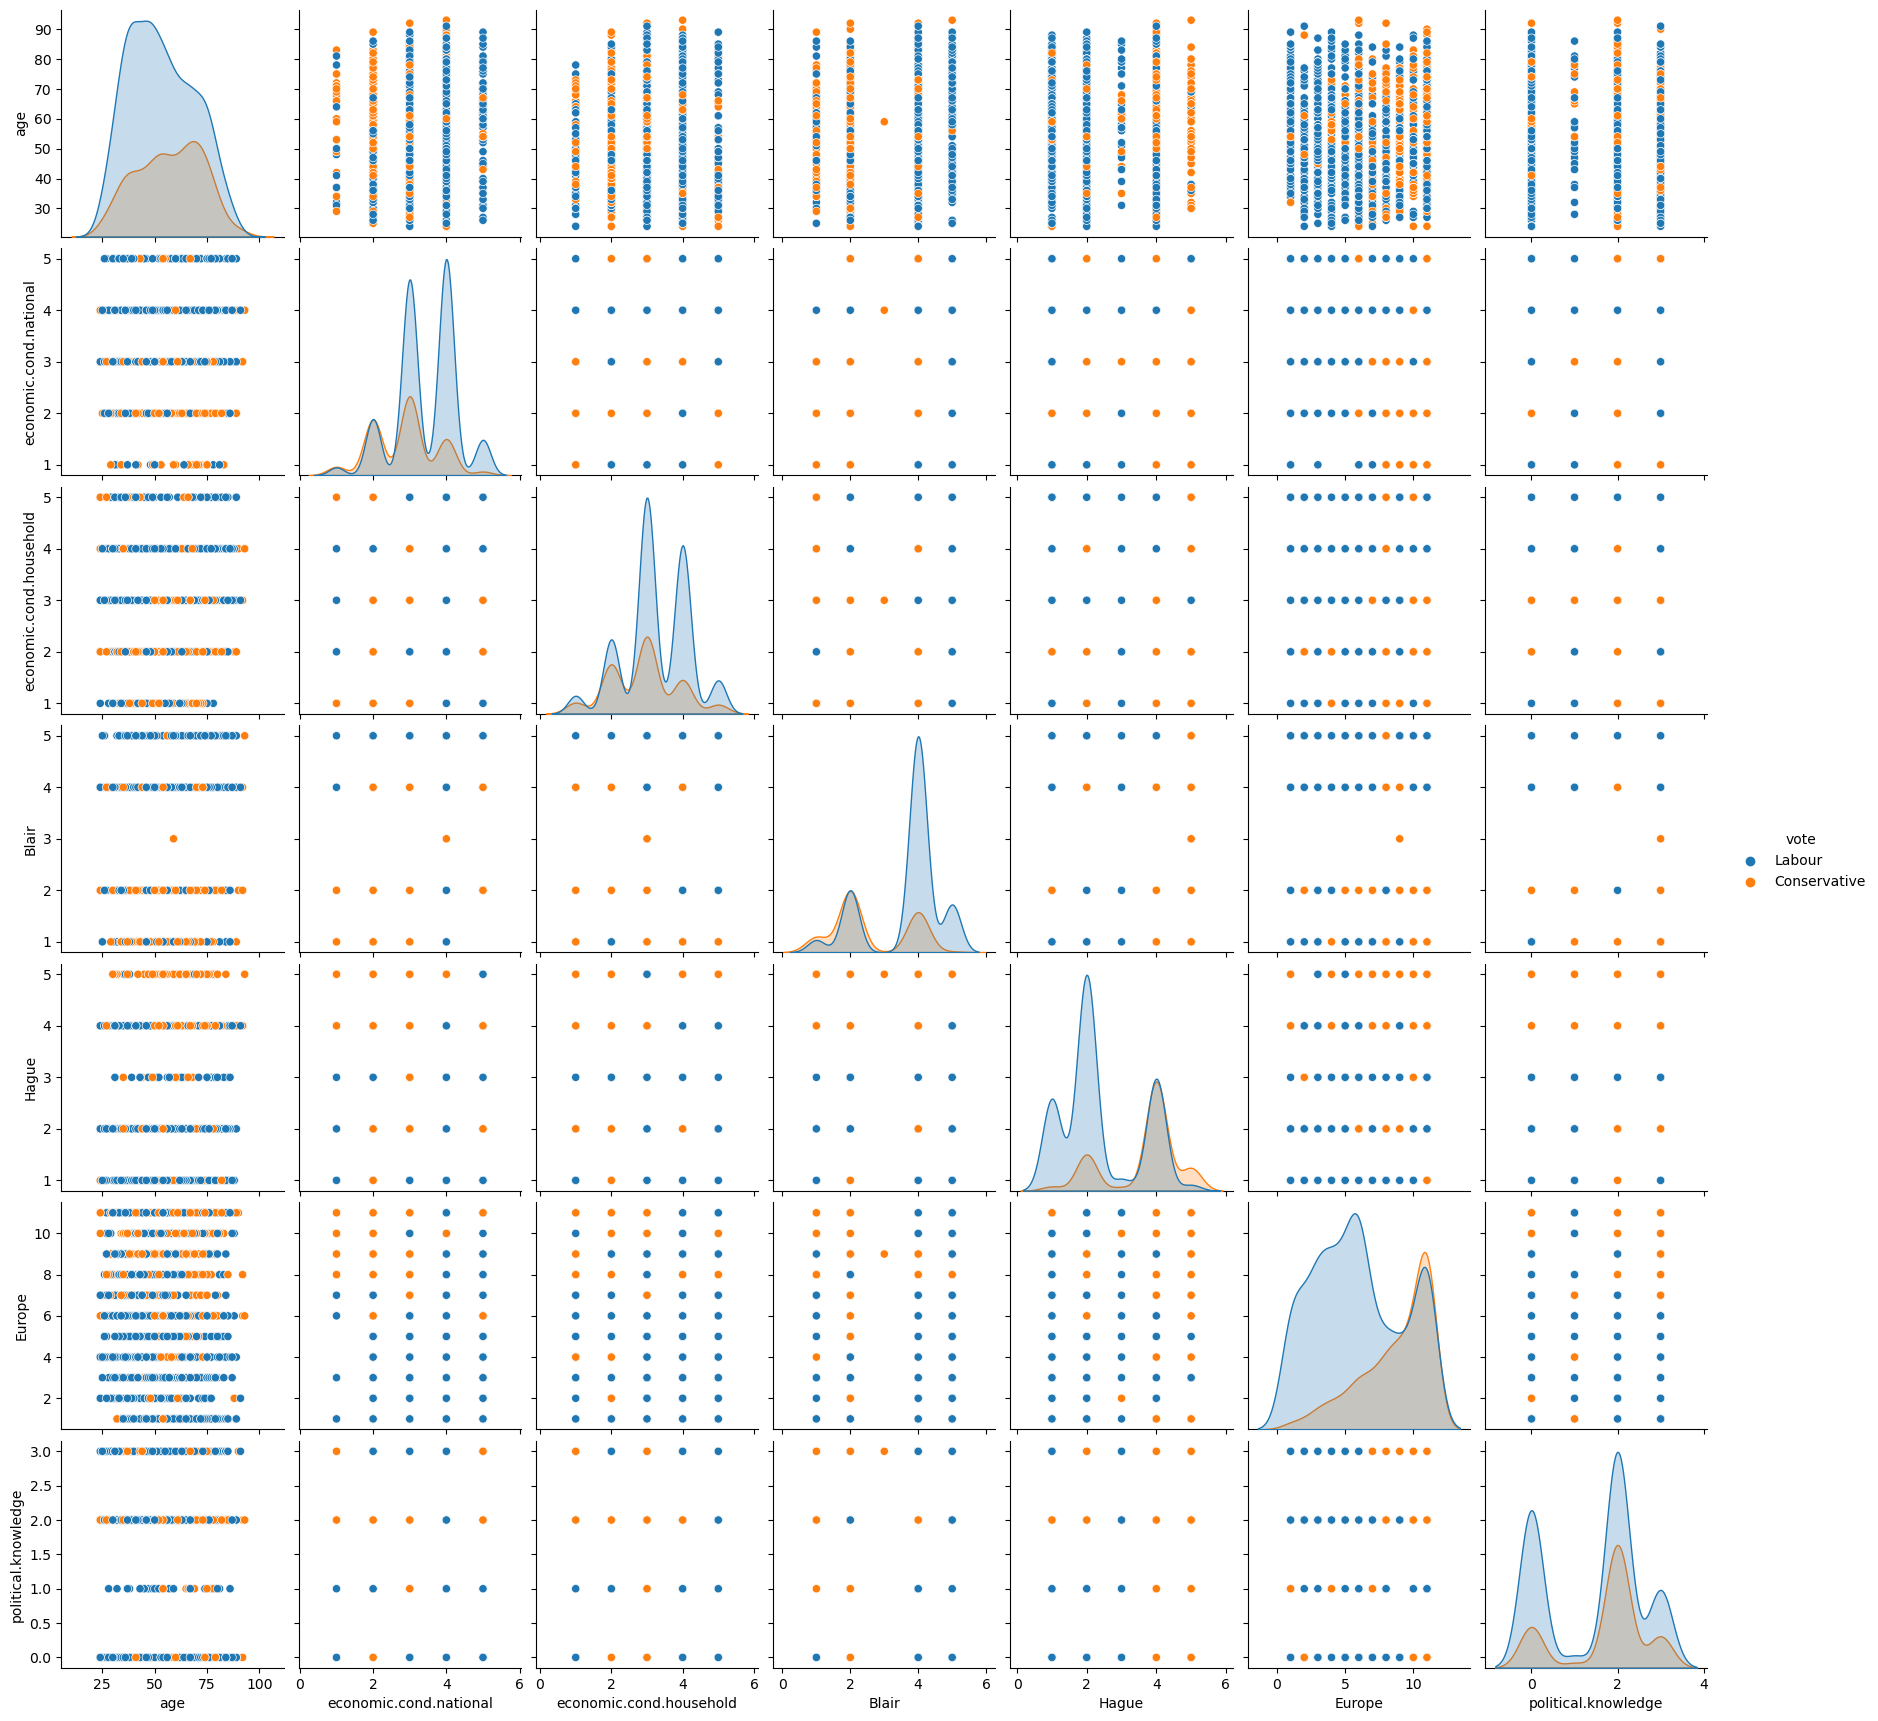

In [29]:
sns.pairplot(election,hue ='vote');

### Data Pre-processing

### Prepare the data for modelling: - Outlier Detection(treat, if needed)) - Encode the data - Data split - Scale the data (and state your reasons for scaling the features)

### construct box plot for Numerical variables


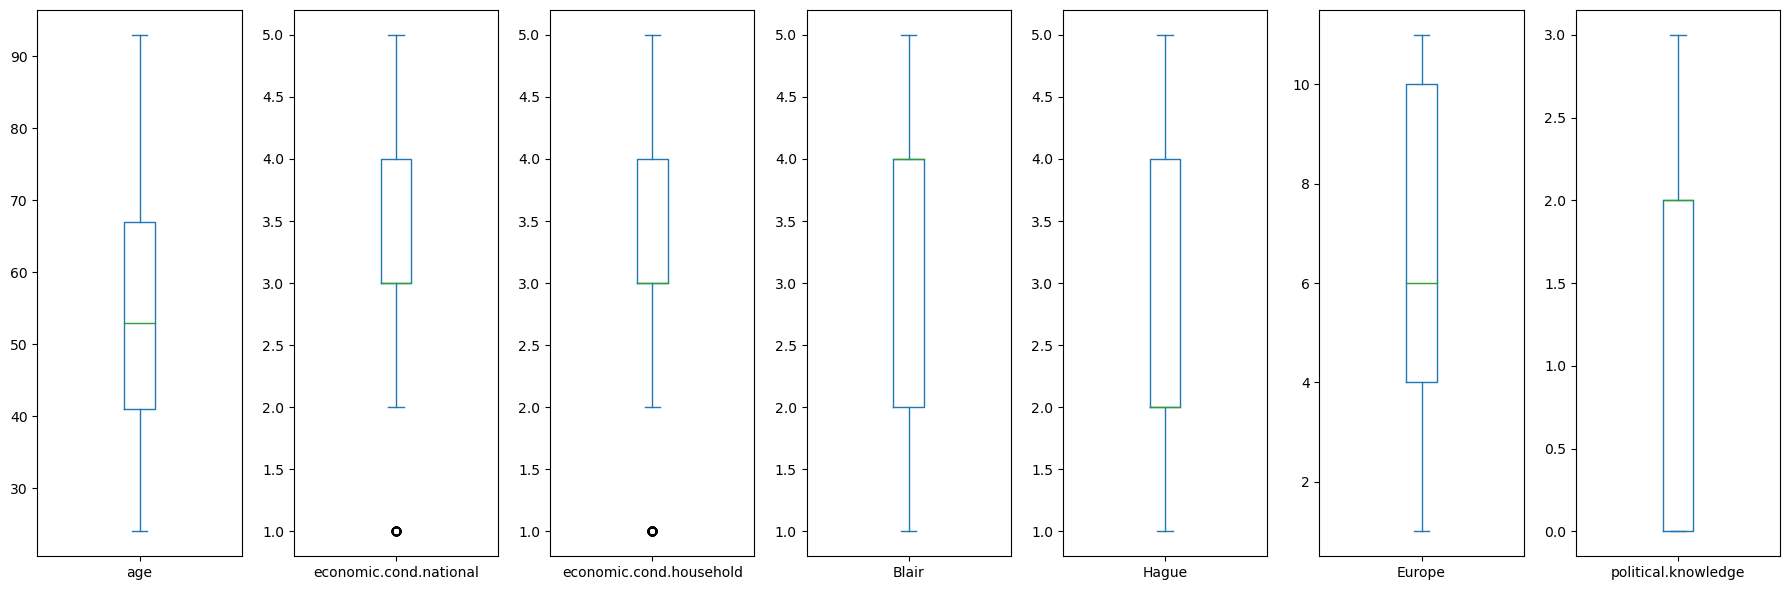

In [30]:
election[num].plot(kind = 'box', subplots = True, figsize = (18,6))
plt.tight_layout();

No outliers are present here in "age", & Other Columns econiomic conditions are ordinal Variables so the can't are not an Outiler (as per Outlier defination Outliers are those values which are Mistakenly Captured in the data)



### Dummy Variable one hot Encoding for Gender


In [31]:
election =pd.get_dummies(election, columns=['gender'],drop_first=True)


In [32]:
election.head()


vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender_male  
0       2                    2            0  
1       5                    2            1  
2       3                    2            1  
3       4                    0            0  
4       6                    2            1

In [33]:
election.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender_male  
0       2                    2            0  
1       5                    2            1  
2       3                    2            1  
3       4                    0            0  
4       6                    2            1

As we can see that Age variable is having discreete values so to convert this to ordinal values we will use binning method as below


In [34]:
election['age_bins'] = pd.cut(x=election['age'], bins=[20, 29, 39, 49,59,69,79,89,99],labels=['20s', '30s', '40s','50s','60s','70s','80s','90s'])


In [35]:
election['age_bins'].unique().sort_values()


['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
Categories (8, object): ['20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s' < '90s']

In [36]:
election.head(2)

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   

   Europe  political.knowledge  gender_male age_bins  
0       2                    2            0      40s  
1       5                    2            1      30s

In [37]:
election.drop("age",axis=1,inplace=True)


In [38]:
election.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   object  
 1   economic.cond.national   1517 non-null   int64   
 2   economic.cond.household  1517 non-null   int64   
 3   Blair                    1517 non-null   int64   
 4   Hague                    1517 non-null   int64   
 5   Europe                   1517 non-null   int64   
 6   political.knowledge      1517 non-null   int64   
 7   gender_male              1517 non-null   uint8   
 8   age_bins                 1517 non-null   category
dtypes: category(1), int64(6), object(1), uint8(1)
memory usage: 130.4+ KB


### Ordinal Encoding of Age bins


In [39]:
feature = "age_bins"
election["age_bins"] = pd.Categorical(election["age_bins"]).codes

In [40]:
election.head()


vote  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour                       3                        3      4      1   
1  Labour                       4                        4      4      4   
2  Labour                       4                        4      5      2   
3  Labour                       4                        2      2      1   
4  Labour                       2                        2      1      1   

   Europe  political.knowledge  gender_male  age_bins  
0       2                    2            0         2  
1       5                    2            1         1  
2       3                    2            1         1  
3       4                    0            0         0  
4       6                    2            1         2

### Scaling

In [41]:
num

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

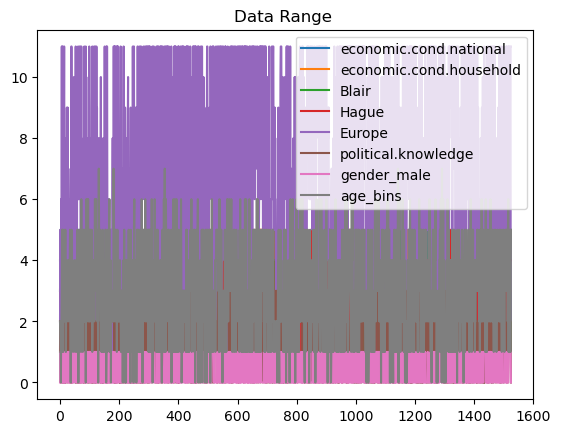

In [42]:
election.plot()
plt.title("Data Range ");

Since Above figure shows that points rangess are 0 -11 and most of the variables are ordinal variables so there is no need of scaling

In [43]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   economic.cond.national   1517 non-null   int64 
 2   economic.cond.household  1517 non-null   int64 
 3   Blair                    1517 non-null   int64 
 4   Hague                    1517 non-null   int64 
 5   Europe                   1517 non-null   int64 
 6   political.knowledge      1517 non-null   int64 
 7   gender_male              1517 non-null   uint8 
 8   age_bins                 1517 non-null   int8  
dtypes: int64(6), int8(1), object(1), uint8(1)
memory usage: 130.1+ KB


### Checking the Distributions of class -i.e. Vote


In [44]:
election.groupby(["vote"]).count()

economic.cond.national  economic.cond.household  Blair  Hague  \
vote                                                                          
Conservative                     460                      460    460    460   
Labour                          1057                     1057   1057   1057   

              Europe  political.knowledge  gender_male  age_bins  
vote                                                              
Conservative     460                  460          460       460  
Labour          1057                 1057         1057      1057

### Data Split: Split the data into train and test (70:30)


### Train-Test Split

In [45]:
# Copy all the predictor variables into X dataframe
X = election.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = election['vote']

In [46]:

X.head()

economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0                       3                        3      4      1       2   
1                       4                        4      4      4       5   
2                       4                        4      5      2       3   
3                       4                        2      2      1       4   
4                       2                        2      1      1       6   

   political.knowledge  gender_male  age_bins  
0                    2            0         2  
1                    2            1         1  
2                    2            1         1  
3                    0            0         0  
4                    2            1         2

In [47]:
y.head()

0    Labour
1    Labour
2    Labour
3    Labour
4    Labour
Name: vote, dtype: object

In [48]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [49]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (1061, 8)
X_test:  (456, 8)
y_train:  (1061,)
y_test:  (456,)


### Model Building


### Metrics of Choice (Justify the evaluation metrics) - Model Building (KNN, Naive bayes, Bagging, Boosting) - Metrics of Choice (Justify the evaluation metrics) - Model Building (KNN, Naive bayes, Bagging, Boosting)

In [50]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, recall_score

import warnings
warnings.filterwarnings('ignore')

In [51]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model

LogisticRegression(max_iter=1000)

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model1=LinearDiscriminantAnalysis()
model1

LinearDiscriminantAnalysis()

In [53]:
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2

GaussianNB()

In [54]:
model1=model1.fit(X_train,y_train)
trainpredict1=model1.predict(X_train)
testpredict1=model1.predict(X_test)
print("The LDA training accuracy :",model1.score(X_train,y_train))
print("The LDA testing accuracy:",model1.score(X_test,y_test))

The LDA training accuracy : 0.8331762488218661
The LDA testing accuracy: 0.8377192982456141


In [55]:
model=model.fit(X_train,y_train)
trainpredict=model.predict(X_train)
testpredict=model.predict(X_test)
print('The logistic reg training model accuracy :',model.score(X_train,y_train))
print("The logistic reg testing model accuracy :",model.score(X_test,y_test))

The logistic reg training model accuracy : 0.8303487276154571
The logistic reg testing model accuracy : 0.831140350877193


In [56]:
model2=model2.fit(X_train,y_train)
trainpredict2=model2.predict(X_train)
testpredict2=model2.predict(X_test)
print("The Naive Bayes training accuracy: ",model2.score(X_train,y_train))
print("The Naive Bayes testing accuracy:",model2.score(X_test,y_test))

The Naive Bayes training accuracy:  0.8360037700282752
The Naive Bayes testing accuracy: 0.8201754385964912


### LOGISTIC REGRESSION


In [89]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',
                           max_iter=10000,
                           penalty='none',verbose=True,
                           n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   16.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset LOGISTIC REGRESSION


In [58]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [59]:
### Getting the Predicted Classes and Probs
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.430059  0.569941
1  0.153130  0.846870
2  0.006441  0.993559
3  0.832957  0.167043
4  0.072029  0.927971

###  Model Evaluation

In [60]:
# Accuracy - Training Data
LR_train_score= model.score(X_train, y_train)
LR_train_score
LR_train_recall_score_Labour = recall_score(y_train,ytrain_predict,labels=None,pos_label='Labour')
LR_train_recall_score_Conservative = recall_score(y_train,ytrain_predict,labels=None,pos_label='Conservative')
print(LR_train_score,LR_train_recall_score_Conservative,LR_train_recall_score_Labour)

0.8303487276154571 0.6351791530944625 0.9098143236074271


AUC: 0.88993


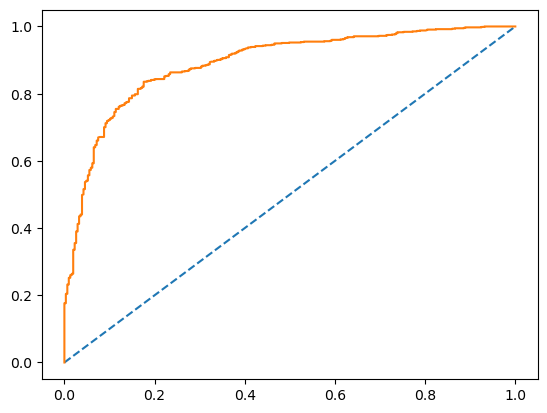

In [61]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.5f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [62]:
# Accuracy - Test Data
LR_test_score =model.score(X_test, y_test)
LR_test_score
LR_test_recall_score_Labour = recall_score(y_test,ytest_predict,labels=None,pos_label='Labour')
LR_test_recall_score_Conservative = recall_score(y_test,ytest_predict,labels=None,pos_label='Conservative')
print(LR_test_score,LR_test_recall_score_Conservative,LR_test_recall_score_Labour)

0.831140350877193 0.7254901960784313 0.8844884488448845


### AUC and ROC for the test data Logistic Regression


AUC: 0.88332


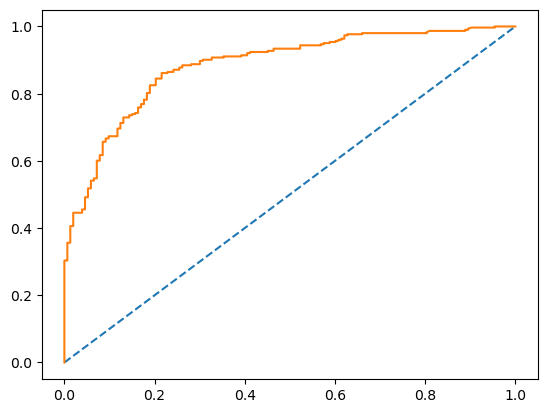

In [63]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.5f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label='Labour') 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data Logistic Regression


In [64]:
confusion_matrix(y_train, ytrain_predict)

array([[195, 112],
       [ 68, 686]], dtype=int64)

In [65]:
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[195, 112],
       [ 68, 686]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.74      0.64      0.68       307
      Labour       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.83      0.83      0.83      1061



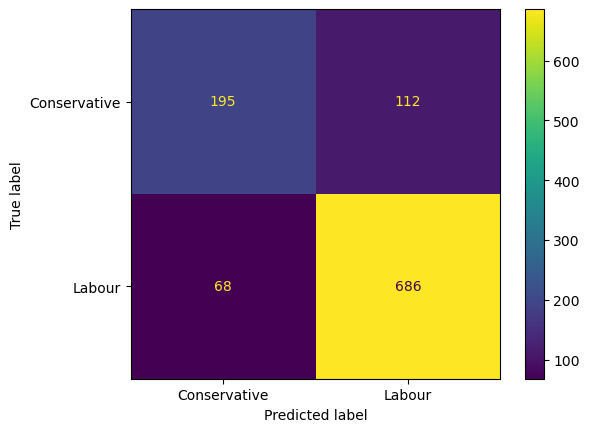

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
print(classification_report(y_train, ytrain_predict))

### Confusion Matrix for test data Logistic Regression


In [67]:
confusion_matrix(y_test, ytest_predict)

array([[111,  42],
       [ 35, 268]], dtype=int64)

In [84]:
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[111,  42],
       [ 35, 268]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.76      0.73      0.74       153
      Labour       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



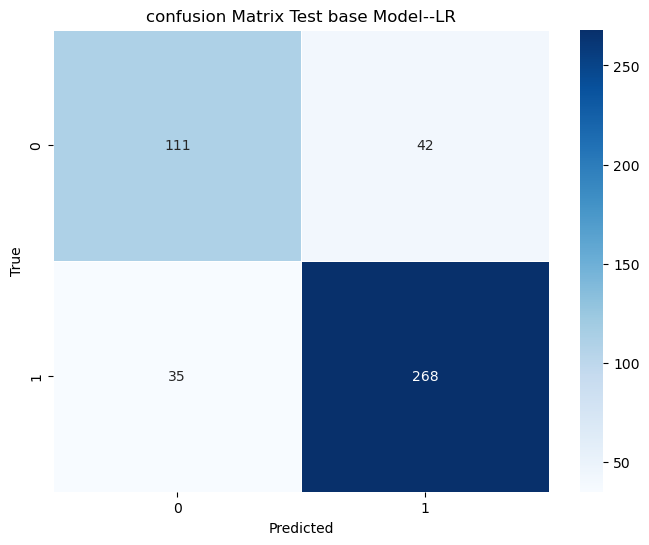

In [85]:
print(classification_report(y_test, ytest_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('confusion Matrix Test base Model--LR')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [86]:
from sklearn.metrics import roc_auc_score

In [90]:
LR_train_predict_prob = model.predict_proba(X_train)
LR_test_predict_prob = model.predict_proba(X_test)
LR_pred_train_prob = model.predict_proba(X_train)
LR_pred_test_prob = model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print(LR_auc_train,LR_auc_test)


0.8899333845981043 0.8833236264802949


AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


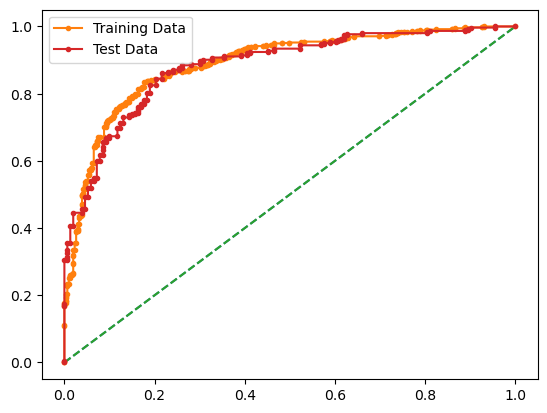

In [91]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,LR_train_predict_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,LR_train_predict_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,LR_test_predict_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,LR_test_predict_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Tuning of Logistic Regression Model


In [92]:
#### Applying GridSearchCV for Logistic Regressio
grid={'penalty':['l2','l1'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [93]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [94]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid, 
                           cv = 3,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'l1'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='accuracy')

In [95]:
grid_search.best_params_

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001}

In [96]:
grid_search.best_estimator_

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')

In [97]:
best_model = grid_search.best_estimator_

In [98]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.429581  0.570419
1  0.154906  0.845094
2  0.006590  0.993410
3  0.830245  0.169755
4  0.073361  0.926639

In [99]:
## Confusion matrix on the training data
confusion_matrix(y_train, ytrain_predict)

array([[195, 112],
       [ 68, 686]], dtype=int64)

In [100]:
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[195, 112],
       [ 68, 686]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.74      0.64      0.68       307
      Labour       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.83      0.83      0.83      1061
 



Text(0.5, 1.0, 'Confusion Matrix Train Data of Tuned Model- LR')

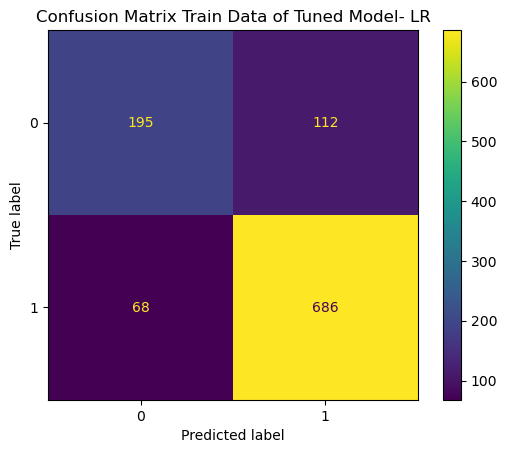

In [102]:
print(classification_report(y_train, ytrain_predict),'\n')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();
plt.title('Confusion Matrix Train Data of Tuned Model- LR')

In [103]:
## Confusion matrix & Classification Report on the test data
confusion_matrix(y_test, ytest_predict)

array([[111,  42],
       [ 35, 268]], dtype=int64)

In [104]:
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[111,  42],
       [ 35, 268]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.76      0.73      0.74       153
      Labour       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



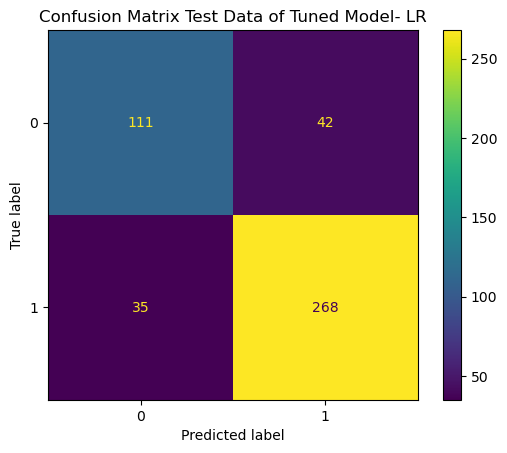

In [105]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();
plt.title('Confusion Matrix Test Data of Tuned Model- LR')
print(classification_report(y_test, ytest_predict));

In [107]:
LR_train_predict_prob = best_model.predict_proba(X_train)
LR_test_predict_prob = best_model.predict_proba(X_test)
LR_pred_train_prob = best_model.predict_proba(X_train)
LR_pred_test_prob = best_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print(LR_auc_train,LR_auc_test)


0.8900111457676323 0.8832804849112362


AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


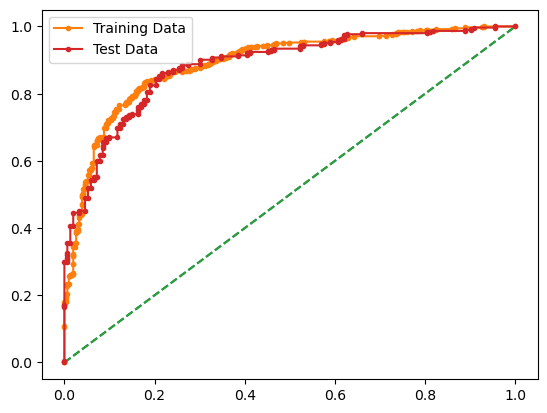

In [108]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,LR_train_predict_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,LR_train_predict_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,LR_test_predict_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,LR_test_predict_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Discriminant Analysis


In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### Training Performance LDA


In [110]:
## Performance Matrix on train data set
LDA_train_predict = LDA_model.predict(X_train)
LDA_train_score = LDA_model.score(X_train, y_train)
LDA_train_recall_score_Labour = recall_score(y_train,LDA_train_predict,labels=None,pos_label='Labour')
LDA_train_recall_score_Conservative = recall_score(y_train,LDA_train_predict,labels=None,pos_label='Conservative')
print(LDA_train_score,LDA_train_recall_score_Conservative,LDA_train_recall_score_Labour)

0.8331762488218661 0.6514657980456026 0.9071618037135278


In [111]:
LDA_train_predict

array(['Conservative', 'Labour', 'Labour', ..., 'Labour', 'Labour',
       'Labour'], dtype='<U12')

              precision    recall  f1-score   support

Conservative       0.74      0.65      0.69       307
      Labour       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



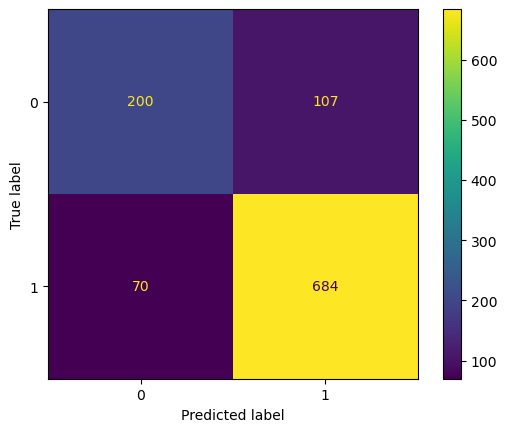

In [112]:
# Confusion Matrix on Train Data -LDA & classification Report
cm = metrics.confusion_matrix(y_train,LDA_train_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(metrics.classification_report(y_train,LDA_train_predict))

### Test Performance LDA


In [113]:
## Performance Matrix on test data set
LDA_test_predict = LDA_model.predict(X_test)
LDA_test_score = LDA_model.score(X_test, y_test)
LDA_test_recall_score_Labour = recall_score(y_test,LDA_test_predict,labels=None,pos_label='Labour')
LDA_test_recall_score_Conservative = recall_score(y_test,LDA_test_predict,labels=None,pos_label='Conservative')
print(LDA_test_score,LDA_test_recall_score_Conservative,LDA_test_recall_score_Labour)

0.8377192982456141 0.7254901960784313 0.8943894389438944


              precision    recall  f1-score   support

Conservative       0.78      0.73      0.75       153
      Labour       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



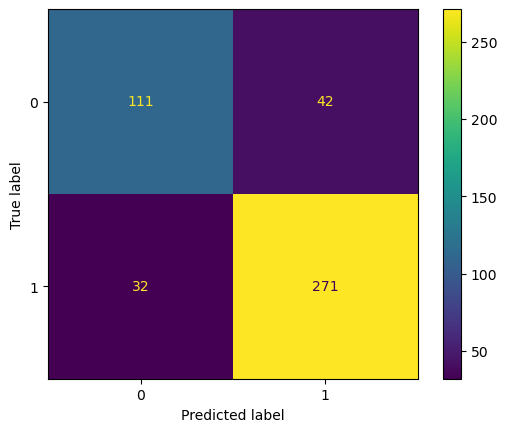

In [114]:
# Confusion Matrix on Train Data -LDA & classification Report
cm = metrics.confusion_matrix(y_test,LDA_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(metrics.classification_report(y_test,LDA_test_predict))

### Probability prediction for the training and test data -LDA


In [115]:
pred_train_prob = LDA_model.predict_proba(X_train)
pred_test_prob = LDA_model.predict_proba(X_test)

auc_train = roc_auc_score(y_train,pred_train_prob[:,1])
auc_test = roc_auc_score(y_test,pred_test_prob[:,1])

In [116]:
pred_train_prob 
# we are interested in the probability of the class being 1
# hence we will be extracting the second column in the output below
# using pred_train_prob[:,1]
# using pred_train_prob[:,1][0] gives the prob prediction for the first
# row, pred_train_prob[:,1][1] gives the prob prediction for the second
#row and so on. we will use this in a loop below

array([[0.95076594, 0.04923406],
       [0.08683344, 0.91316656],
       [0.31984175, 0.68015825],
       ...,
       [0.22039572, 0.77960428],
       [0.22514368, 0.77485632],
       [0.01674761, 0.98325239]])

AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


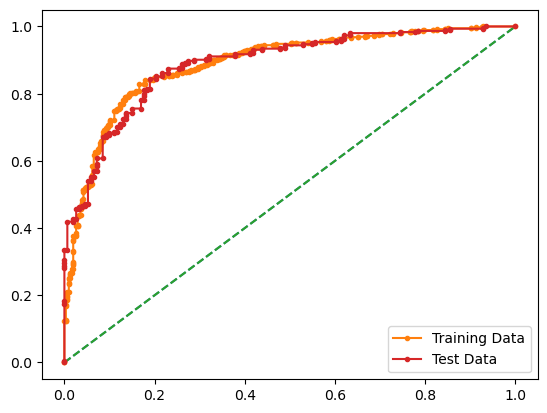

In [117]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_train_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_train_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_test_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_test_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Changing Default Threshold Probability


In [118]:
from sklearn.metrics import accuracy_score,f1_score, recall_score


In [119]:
thresh = [] # empty list to store threshold values
acc = [] # empty list to store accuracy for various threshold values
f1_scr = [] # empty list to store F1 score for various...
rec = [] # empty list to store recall score for various...

for j in np.arange(0.1,1,0.1):
    thresh.append(j)
    custom_prob = j #defining the custom cut-off/threshold probability value of our choice
    custom_cutoff_data=[]#defining an empty list to store category pred
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if pred_train_prob[:,1][i] > custom_prob:#checking the condition for our probability values to be 
            #greater than the custom cutoff/threshold probability value
            a='Labour' #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a='Conservative' #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding category predictions for the given j(cut off) to the list
    acc.append(np.round(accuracy_score(y_train,custom_cutoff_data),3))
    f1_scr.append(np.round(f1_score(y_train,custom_cutoff_data ,labels=None,pos_label= 'Labour'),3))
    rec.append(np.round(recall_score(y_train,custom_cutoff_data,labels=None,pos_label= 'Labour'),3))
    

In [120]:
pd.DataFrame({'Threshold': thresh,
             'Accuracy':acc,
             'F-1 Score': f1_scr,
             'Recall':rec})

Threshold  Accuracy  F-1 Score  Recall
0        0.1     0.761      0.854   0.987
1        0.2     0.791      0.868   0.968
2        0.3     0.812      0.878   0.952
3        0.4     0.832      0.888   0.939
4        0.5     0.833      0.885   0.907
5        0.6     0.826      0.876   0.870
6        0.7     0.833      0.877   0.838
7        0.8     0.790      0.835   0.751
8        0.9     0.697      0.737   0.599

In [121]:
data_pred_custom_cutoff=[]
for i in range(len(pred_test_prob)):
    if pred_test_prob[:,1][i] > 0.1: # for best recall performace
        a = 'Labour'
    else:
        a = 'Conservative'
    data_pred_custom_cutoff.append(a)

In [122]:
print('Classification Report of the default cut-off test data:\n\n',
      classification_report(y_test,LDA_test_predict),'\n\n\n')

print('Classification Report of the custom cut-off test data:\n\n',
      classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

Conservative       0.78      0.73      0.75       153
      Labour       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

Conservative       0.88      0.24      0.37       153
      Labour       0.72      0.98      0.83       303

    accuracy                           0.73       456
   macro avg       0.80      0.61      0.60       456
weighted avg       0.77      0.73      0.68       456
 



### Applying GridsearchCV IN LDA


In [123]:
grid={'solver':['lsqr','eigen'],
      'n_components':[1,7,2]}
      

In [124]:
model = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid, 
                           cv = 5,n_jobs=-1)

In [125]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [1, 7, 2],
                         'solver': ['lsqr', 'eigen']})

In [126]:

grid_search.best_params_
grid_search.best_estimator_
best_model = grid_search.best_estimator_
best_model

LinearDiscriminantAnalysis(n_components=1, solver='lsqr')

In [127]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [128]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.472249  0.527751
1  0.138578  0.861422
2  0.005601  0.994399
3  0.857034  0.142966
4  0.060017  0.939983

In [129]:
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[200, 107],
       [ 70, 684]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.74      0.65      0.69       307
      Labour       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



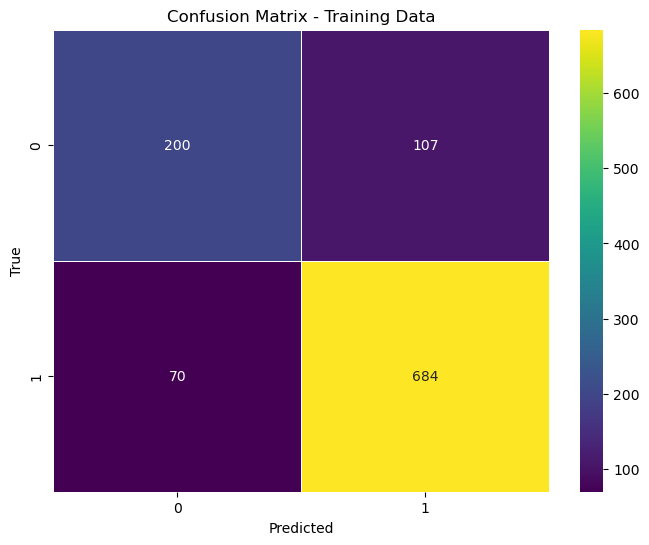

In [130]:
## Confusion matrix on the training data
print(classification_report(y_train, ytrain_predict),'\n');
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', linewidths=.5)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [131]:
## Confusion matrix on the test data
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[111,  42],
       [ 32, 271]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.78      0.73      0.75       153
      Labour       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456
 



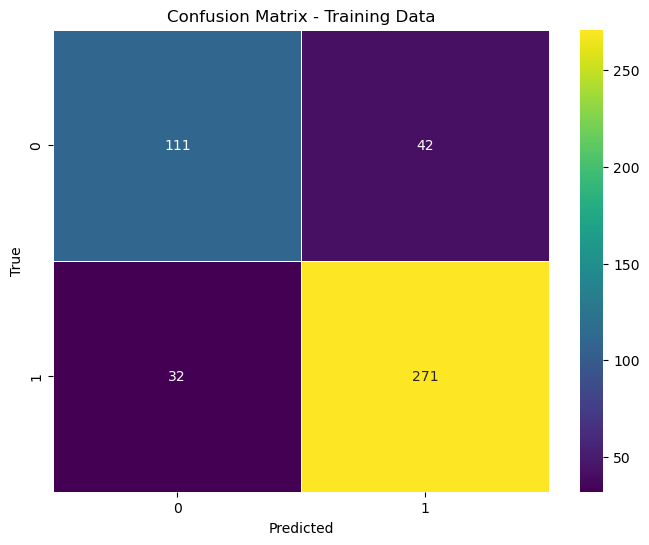

In [132]:
print(classification_report(y_test, ytest_predict),'\n');
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', linewidths=.5)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [133]:
LDA_pred_train_prob = best_model.predict_proba(X_train)
LDA_pred_test_prob = best_model.predict_proba(X_test)

LDA_auc_train = roc_auc_score(y_train,pred_train_prob[:,1])
LDA_auc_test = roc_auc_score(y_test,pred_test_prob[:,1])

AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


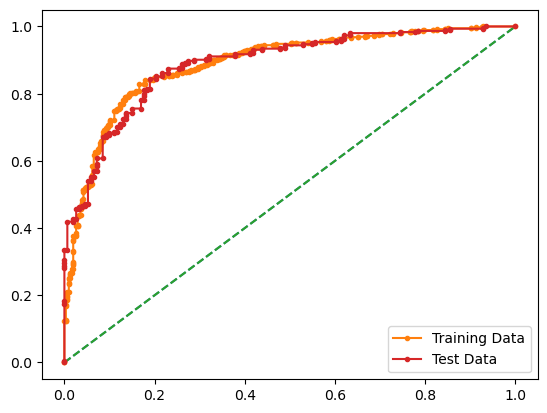

In [134]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,LDA_pred_train_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,LDA_pred_train_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,LDA_pred_test_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,LDA_pred_test_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Apply KNN Model and Naïve Bayes Model. Interpret the inferences of each model


### KNN Model


In [135]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

### Training Performance of KNN Model


In [136]:
## Performance Matrix on train data set
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_score = KNN_model.score(X_train, y_train)
KNN_train_recall_score_Labour = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Labour')
KNN_train_recall_score_Conservative = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Conservative')
print(KNN_train_score,KNN_train_recall_score_Conservative,KNN_train_recall_score_Labour)

0.8605089538171536 0.7100977198697068 0.9217506631299734


In [137]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = KNN_model.predict(X_test)
KNN_model.score(X_test, y_test)

0.8114035087719298

              precision    recall  f1-score   support

Conservative       0.79      0.71      0.75       307
      Labour       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



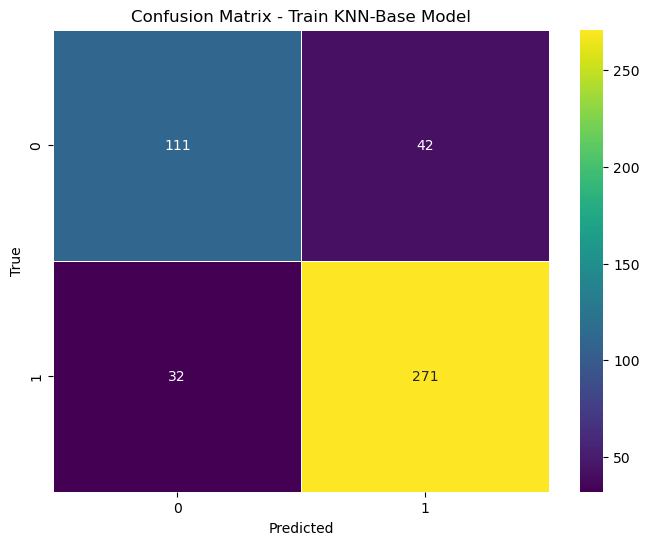

In [138]:
print(classification_report(y_train, KNN_train_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', linewidths=.5)
plt.title('Confusion Matrix - Train KNN-Base Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Test Performance on KNN Model


In [139]:
## Performance Matrix on test data set
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_score = KNN_model.score(X_test, y_test)
KNN_test_recall_score_Labour = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Labour')
KNN_test_recall_score_Conservative  = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Conservative')
print(KNN_test_score,KNN_test_recall_score_Conservative,KNN_test_recall_score_Labour)

0.8114035087719298 0.6535947712418301 0.8910891089108911


              precision    recall  f1-score   support

Conservative       0.75      0.65      0.70       153
      Labour       0.84      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



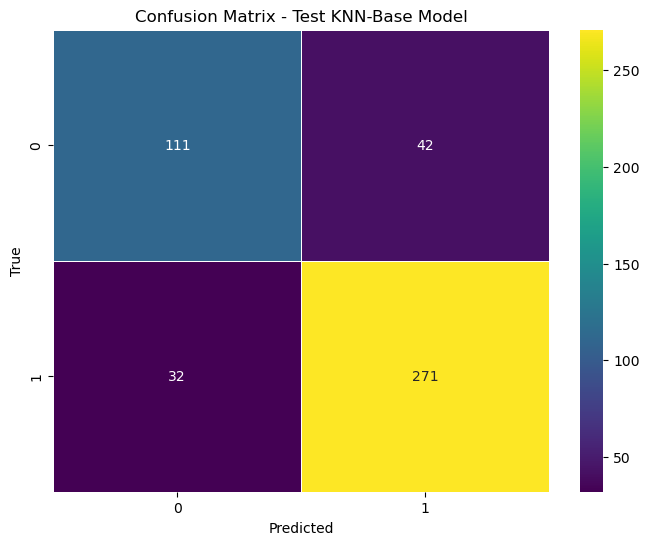

In [140]:
print(classification_report(y_test, KNN_test_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', linewidths=.5)
plt.title('Confusion Matrix - Test KNN-Base Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [144]:
KNN_pred_train_prob = KNN_model.predict_proba(X_train)
KNN_pred_test_prob = KNN_model.predict_proba(X_test)

KNN_auc_train = roc_auc_score(y_train,KNN_pred_train_prob[:,1])
KNN_auc_test = roc_auc_score(y_test,KNN_pred_test_prob[:,1])

AUC for the Training Data: 0.903
AUC for the Test Data: 0.892


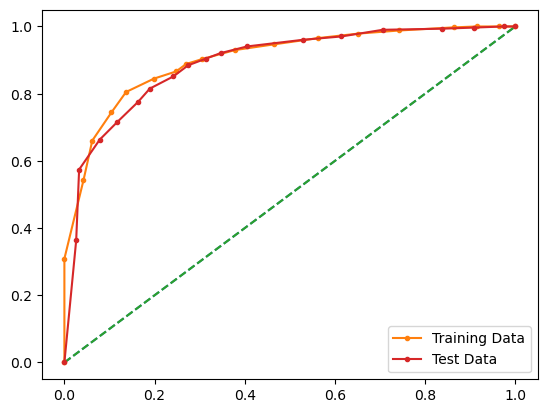

In [145]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,KNN_pred_train_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,KNN_pred_train_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,KNN_pred_test_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,KNN_pred_test_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### TUNING OF KNN MODEL WITH LESS MISCLASSIFICATION ERROR


Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [146]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores] # this technique is called list comprehension
MCE

[0.2149122807017544,
 0.1907894736842105,
 0.17763157894736847,
 0.1885964912280702,
 0.17324561403508776,
 0.18201754385964908,
 0.18201754385964908,
 0.16885964912280704,
 0.16885964912280704,
 0.16228070175438591]

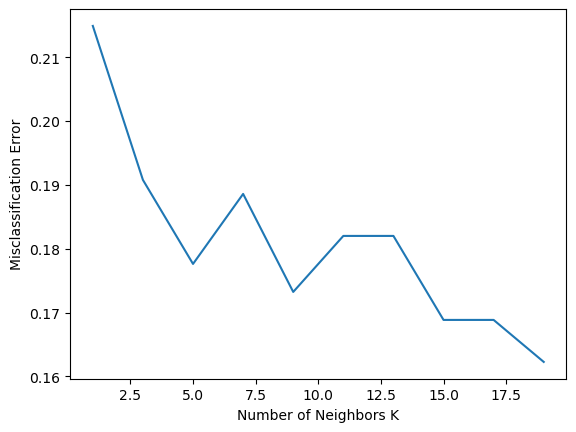

In [147]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


### Misclassification Error is low at K =15 so we will take 15 Neighbors



In [148]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

### Training Performance


In [149]:
## Performance Matrix on train data set
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_score = KNN_model.score(X_train, y_train)
KNN_train_recall_score_Labour = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Labour')
KNN_train_recall_score_Conservative = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Conservative')
print(KNN_train_score,KNN_train_recall_score_Conservative,KNN_train_recall_score_Labour)

0.8426013195098964 0.6938110749185668 0.903183023872679


              precision    recall  f1-score   support

Conservative       0.74      0.69      0.72       307
      Labour       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



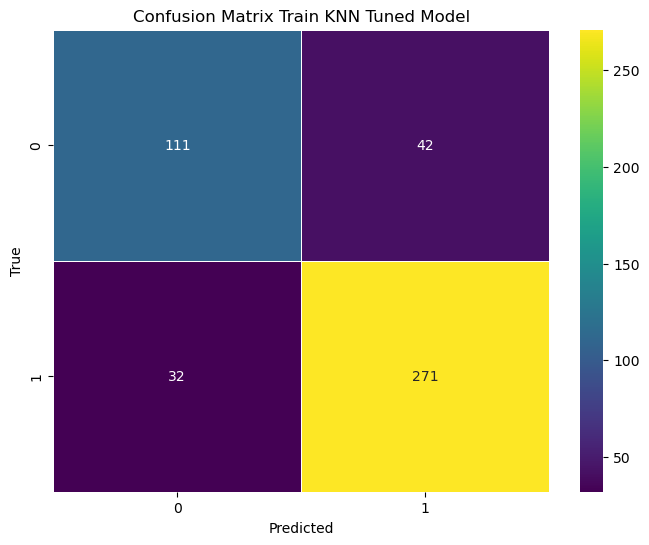

In [150]:
print(classification_report(y_train, KNN_train_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', linewidths=.5)
plt.title('Confusion Matrix Train KNN Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Test Performance


In [151]:
## Performance Matrix on test data set
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_score = KNN_model.score(X_test, y_test)
KNN_test_recall_score_Labour = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Labour')
KNN_test_recall_score_Conservative  = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Conservative')
print(KNN_test_score,KNN_test_recall_score_Conservative,KNN_test_recall_score_Labour)

0.831140350877193 0.6862745098039216 0.9042904290429042


              precision    recall  f1-score   support

Conservative       0.78      0.69      0.73       153
      Labour       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



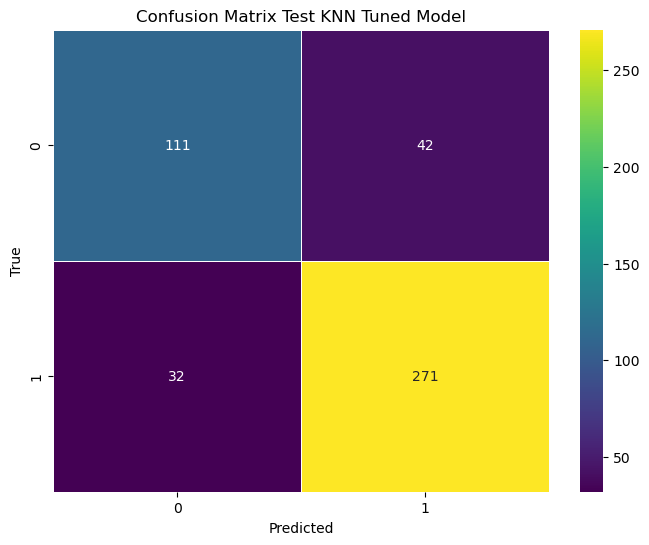

In [152]:
print(classification_report(y_test, KNN_test_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', linewidths=.5)
plt.title('Confusion Matrix Test KNN Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [153]:
KNN_pred_train_prob = KNN_model.predict_proba(X_train)
KNN_pred_test_prob = KNN_model.predict_proba(X_test)

KNN_auc_train = roc_auc_score(y_train,KNN_pred_train_prob[:,1])
KNN_auc_test = roc_auc_score(y_test,KNN_pred_test_prob[:,1])

AUC for the Training Data: 0.903
AUC for the Test Data: 0.892


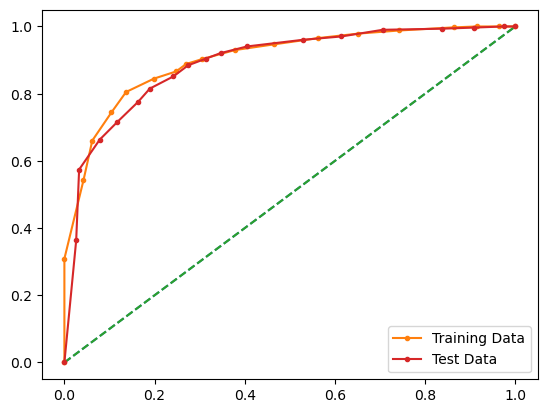

In [154]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,KNN_pred_train_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,KNN_pred_train_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,KNN_pred_test_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,KNN_pred_test_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Naive Bayes Model

In [155]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, recall_score

In [156]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

### Training Performance on Naive Bayes Model


In [157]:
## Performance Matrix on train data set
NB_train_predict = NB_model.predict(X_train)
NB_train_score = NB_model.score(X_train, y_train)
NB_train_recall_score_Labour = recall_score(y_train,NB_train_predict,labels=None,pos_label='Labour')
NB_train_recall_score_Conservative = recall_score(y_train,NB_train_predict,labels=None,pos_label='Conservative')
print(NB_train_score,NB_train_recall_score_Conservative,NB_train_recall_score_Labour)

0.8360037700282752 0.6938110749185668 0.8938992042440318


In [158]:
y_pred = NB_model.predict(X_train)

In [159]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[213,  94],
       [ 80, 674]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.73      0.69      0.71       307
      Labour       0.88      0.89      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



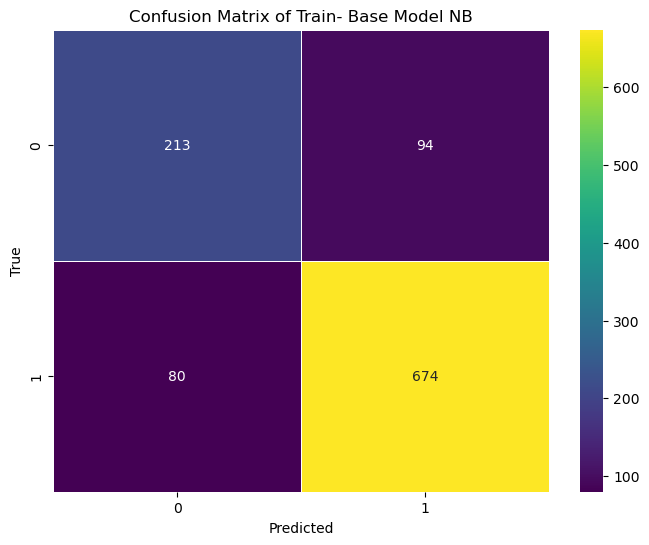

In [160]:
print(classification_report(y_train, NB_train_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', linewidths=.5)
plt.title('Confusion Matrix of Train- Base Model NB')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Test Performance of Naives Bayes Model


In [161]:
## Performance Matrix on test data set
NB_test_predict = NB_model.predict(X_test)
NB_test_score = NB_model.score(X_test, y_test)
NB_test_recall_score_Labour = recall_score(y_test,NB_test_predict,labels=None,pos_label='Labour')
NB_test_recall_score_Conservative = recall_score(y_test,NB_test_predict,labels=None,pos_label='Conservative')
print(NB_test_score,NB_test_recall_score_Conservative,NB_test_recall_score_Labour)

0.8201754385964912 0.7254901960784313 0.8679867986798679


In [162]:
y_pred = NB_model.predict(X_test)

In [163]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[111,  42],
       [ 40, 263]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.74      0.73      0.73       153
      Labour       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



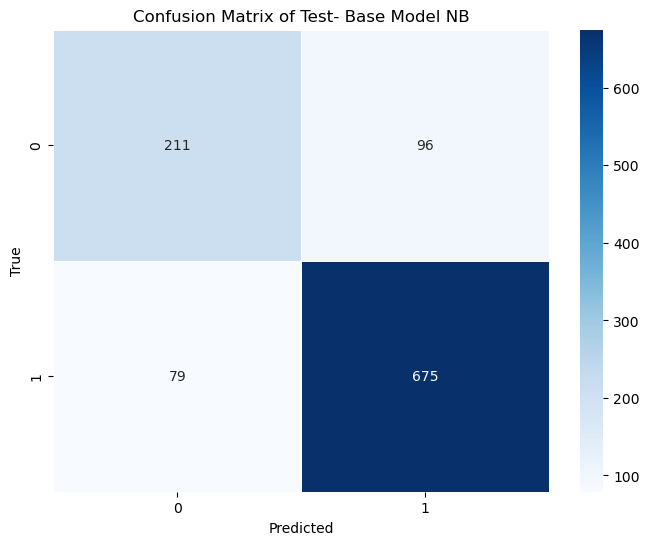

In [169]:
print(classification_report(y_test, NB_test_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix of Test- Base Model NB')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [170]:
NB_pred_train_prob = NB_model.predict_proba(X_train)
NB_pred_test_prob = NB_model.predict_proba(X_test)

NB_auc_train = roc_auc_score(y_train,NB_pred_train_prob[:,1])
NB_auc_test = roc_auc_score(y_test,NB_pred_test_prob[:,1])

AUC for the Training Data: 0.888
AUC for the Test Data: 0.877


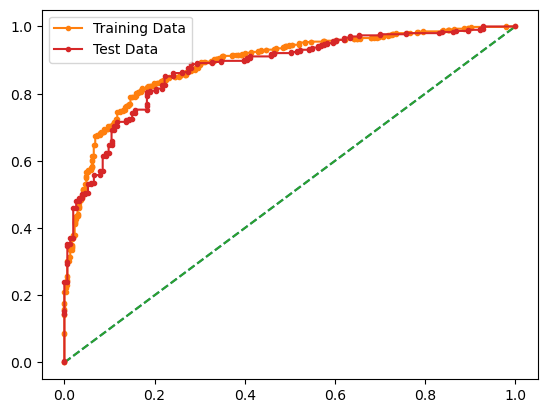

In [171]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,NB_pred_train_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,NB_pred_train_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,NB_pred_test_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,NB_pred_test_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Model Performance improvement

### Improve the model performance of bagging and boosting models by tuning the model - Comment on the model performance improvement on training and test data

### Model Tuning, Bagging and Boosting

In [165]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
#RF_model=RandomForestClassifier(n_estimators=100,random_state=1)

Bagging_model=BaggingClassifier(base_estimator=NB_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=100, random_state=1)

### Training Performance of Navies Bayes Model using Bagging Method


In [166]:
## Performance Matrix on train data set
Bagging_train_predict = Bagging_model.predict(X_train)
Bagging_train_score =Bagging_model.score(X_train, y_train)
Bagging_train_recall_score_Labour = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Labour')
Bagging_train_recall_score_Conservative = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Conservative')
print(Bagging_train_score,Bagging_train_recall_score_Conservative, Bagging_train_recall_score_Labour)

0.8350612629594723 0.6872964169381107 0.8952254641909815


In [167]:
y_pred = Bagging_model.predict(X_train)

In [168]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[211,  96],
       [ 79, 675]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.73      0.69      0.71       307
      Labour       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



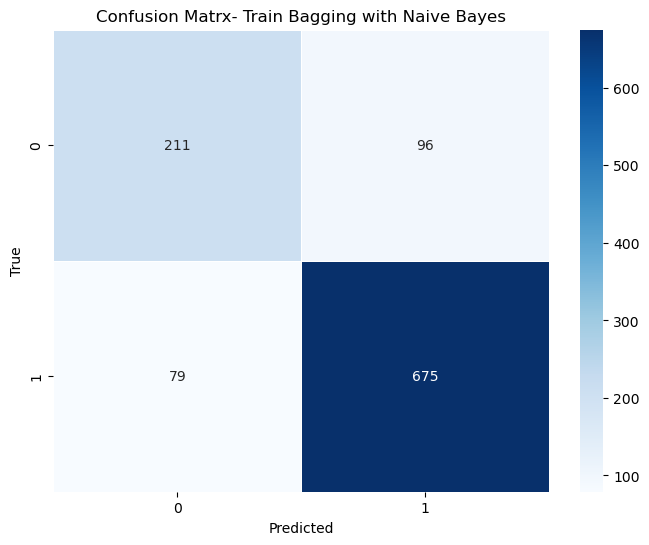

In [172]:
print(classification_report(y_train, Bagging_train_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Confusion Matrx- Train Bagging with Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Test Performance of Navies Bayes Model using Bagging Method



In [173]:
## Performance Matrix on test data set
Bagging_test_predict = Bagging_model.predict(X_test)
Bagging_test_score = Bagging_model.score(X_test, y_test)
Bagging_test_recall_score_Labour = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Labour')
Bagging_test_recall_score_Conservative = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Conservative')
                                                
print(Bagging_test_score,Bagging_test_recall_score_Conservative, Bagging_test_recall_score_Labour)

0.8223684210526315 0.7254901960784313 0.8712871287128713


In [174]:
y_pred = Bagging_model.predict(X_test)

In [175]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[111,  42],
       [ 39, 264]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.74      0.73      0.73       153
      Labour       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



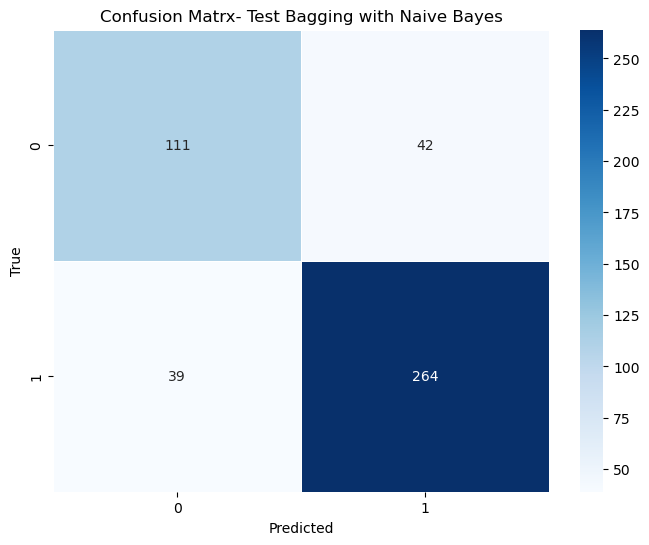

In [176]:
print(classification_report(y_test, Bagging_test_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Confusion Matrx- Test Bagging with Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [177]:
Bagging_pred_train_prob = Bagging_model.predict_proba(X_train)
Bagging_pred_test_prob = Bagging_model.predict_proba(X_test)

Bagging_auc_train = roc_auc_score(y_train,Bagging_pred_train_prob[:,1])
Bagging_auc_test = roc_auc_score(y_test,Bagging_pred_test_prob[:,1])



AUC for the Training Data: 0.888
AUC for the Test Data: 0.877


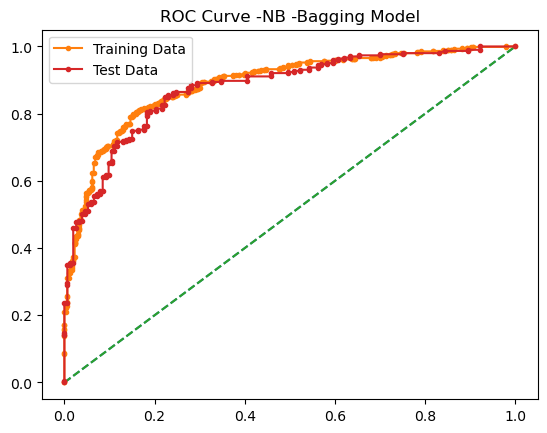

In [178]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,Bagging_pred_train_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,Bagging_pred_train_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,Bagging_pred_test_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,Bagging_pred_test_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve -NB -Bagging Model')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Random Forest


In [179]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Training Performance of Random Forest


In [180]:
## Performance Matrix on train data set
RF_train_predict = RF_model.predict(X_train)
RF_train_score =RF_model.score(X_train, y_train)
RF_train_recall_score_Labour = recall_score(y_train,RF_train_predict,labels=None,pos_label = 'Labour')
RF_train_recall_score_Conservative = recall_score(y_train,RF_train_predict,labels=None,pos_label = 'Conservative')
print(RF_train_score,RF_train_recall_score_Conservative,RF_train_recall_score_Labour)

0.9924599434495759 0.9869706840390879 0.9946949602122016


In [181]:
y_pred = RF_model.predict(X_train)

In [182]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[303,   4],
       [  4, 750]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.99      0.99      0.99       307
      Labour       0.99      0.99      0.99       754

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061



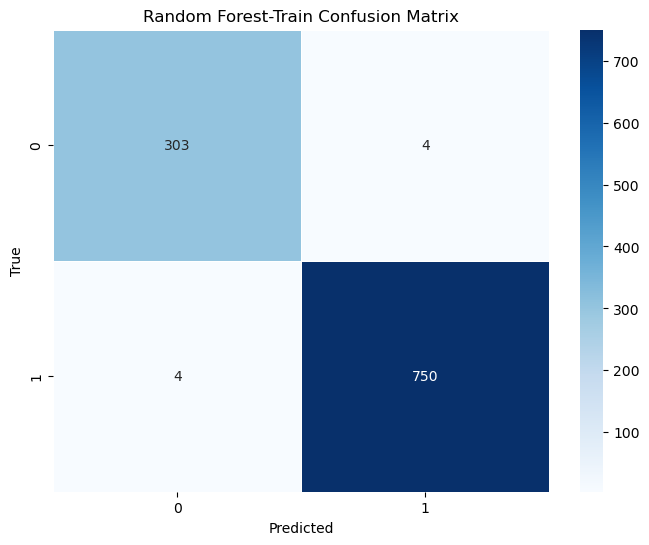

In [183]:
print(classification_report(y_train, RF_train_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Random Forest-Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Test Performace of Random Forest


In [184]:
## Performance Matrix on test data set
RF_test_predict = RF_model.predict(X_test)
RF_test_score = RF_model.score(X_test, y_test)
RF_test_recall_score_Labour = recall_score(y_test, RF_test_predict,labels=None,pos_label = 'Labour')
RF_test_recall_score_Conservative = recall_score(y_test, RF_test_predict,labels=None,pos_label = 'Conservative')
print(RF_test_score,RF_test_recall_score_Conservative,RF_test_recall_score_Labour)

0.8092105263157895 0.6405228758169934 0.8943894389438944


In [185]:
y_pred = RF_model.predict(X_test)

In [186]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 98,  55],
       [ 32, 271]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.75      0.64      0.69       153
      Labour       0.83      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.80       456



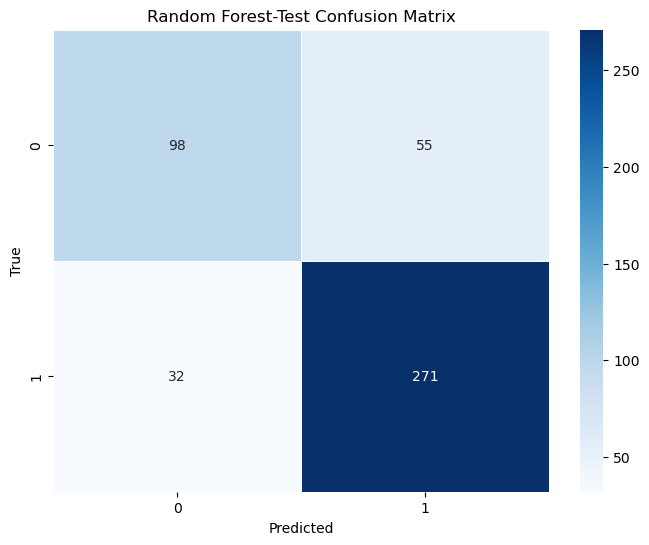

In [187]:
print(classification_report(y_test, RF_test_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Random Forest-Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Bagging method on Random Forest


In [188]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)

Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

### Training Performance of Bagging method used on Random Forest


In [189]:
## Performance Matrix on train data set
Bagging_train_predict = Bagging_model.predict(X_train)
Bagging_train_score =Bagging_model.score(X_train, y_train)
Bagging_train_recall_score_Labour = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Labour')
Bagging_train_recall_score_Conservative = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Conservative')
print(Bagging_train_score,Bagging_train_recall_score_Conservative, Bagging_train_recall_score_Labour)

0.9613572101790764 0.8859934853420195 0.9920424403183024


In [190]:
y_pred = Bagging_model.predict(X_train)

In [191]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[272,  35],
       [  6, 748]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.98      0.89      0.93       307
      Labour       0.96      0.99      0.97       754

    accuracy                           0.96      1061
   macro avg       0.97      0.94      0.95      1061
weighted avg       0.96      0.96      0.96      1061



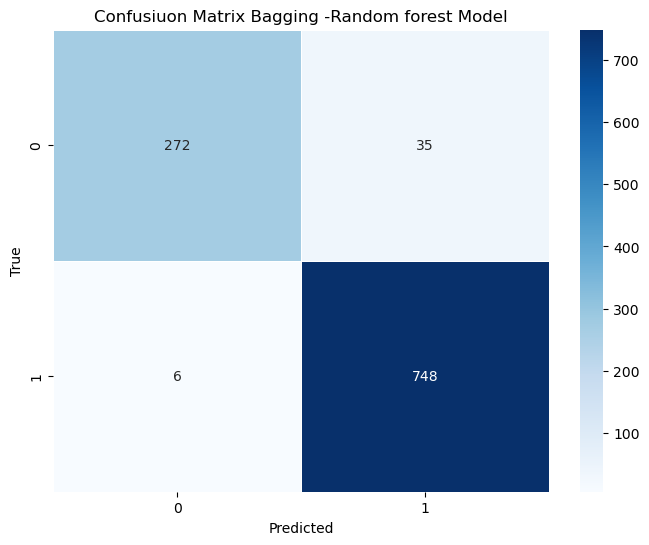

In [192]:
print(classification_report(y_train, Bagging_train_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Confusiuon Matrix Bagging -Random forest Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Test Performance on Random Forest using Bagging method


In [193]:
## Performance Matrix on test data set
Bagging_test_predict = Bagging_model.predict(X_test)
Bagging_test_score = Bagging_model.score(X_test, y_test)
Bagging_test_recall_score_Labour = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Labour')
Bagging_test_recall_score_Conservative = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Conservative')
                                                
print(Bagging_test_score,Bagging_test_recall_score_Conservative, Bagging_test_recall_score_Labour)

0.831140350877193 0.673202614379085 0.9108910891089109


In [194]:
y_pred = Bagging_model.predict(X_test)

In [195]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[103,  50],
       [ 27, 276]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.79      0.67      0.73       153
      Labour       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



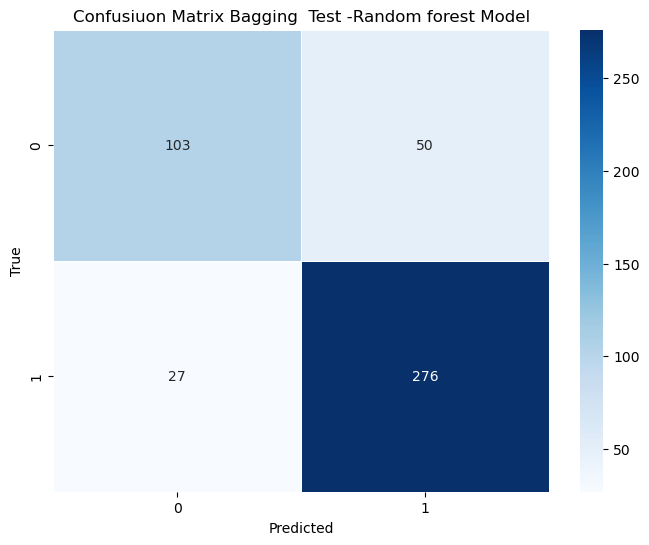

In [196]:
print(classification_report(y_test, Bagging_test_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Confusiuon Matrix Bagging  Test -Random forest Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [197]:
Bagging_pred_train_prob = Bagging_model.predict_proba(X_train)
Bagging_pred_test_prob = Bagging_model.predict_proba(X_test)

Bagging_auc_train = roc_auc_score(y_train,Bagging_pred_train_prob[:,1])
Bagging_auc_test = roc_auc_score(y_test,Bagging_pred_test_prob[:,1])

AUC for the Training Data: 0.996
AUC for the Test Data: 0.894


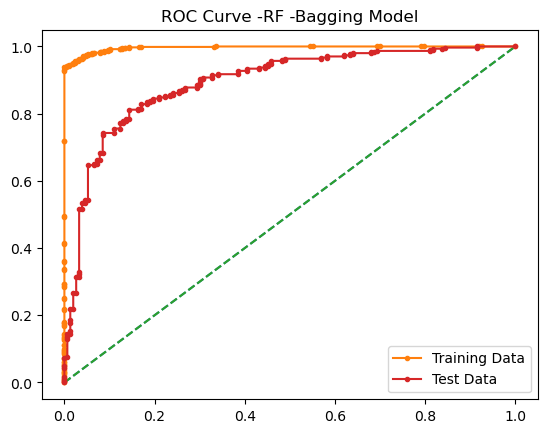

In [198]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,Bagging_pred_train_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,Bagging_pred_train_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,Bagging_pred_test_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,Bagging_pred_test_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve -RF -Bagging Model')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Ada Boost


In [199]:
from sklearn.ensemble import AdaBoostClassifier

In [200]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

### Training Performance of Ada Boosting


In [201]:
## Performance Matrix on train data set
ADB_train_predict = ADB_model.predict(X_train)
ADB_train_score = ADB_model.score(X_train, y_train)
ADB_train_recall_score_Labour = recall_score(y_train,ADB_train_predict,labels=None,pos_label='Labour')
ADB_train_recall_score_Conservative = recall_score(y_train,ADB_train_predict,labels=None,pos_label='Conservative')
print(ADB_train_score,ADB_train_recall_score_Conservative,ADB_train_recall_score_Labour)

0.8407163053722903 0.6807817589576547 0.9058355437665783


In [202]:
y_pred = ADB_model.predict(X_train)

In [203]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[209,  98],
       [ 71, 683]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.75      0.68      0.71       307
      Labour       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



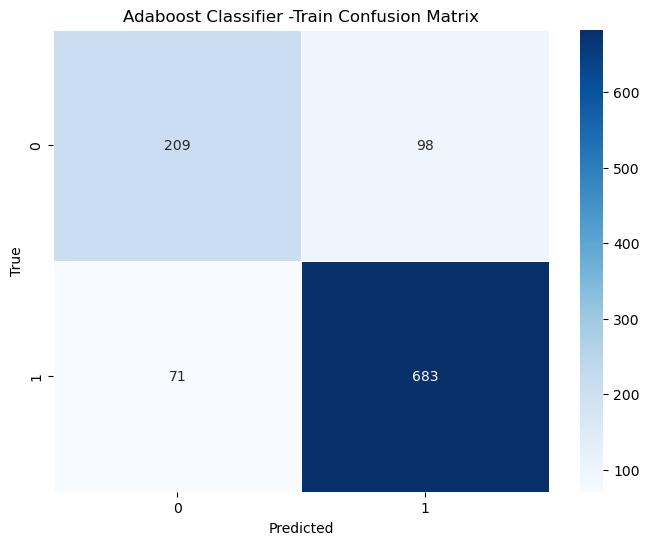

In [204]:
print(classification_report(y_train, ADB_train_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Adaboost Classifier -Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Test Performance of Ada Boosting


In [205]:
## Performance Matrix on test data set
ADB_test_predict = ADB_model.predict(X_test)
ADB_test_score = ADB_model.score(X_test, y_test)
ADB_test_recall_score_Labour = recall_score(y_test,ADB_test_predict,labels=None,pos_label='Labour')
ADB_test_recall_score_Conservative = recall_score(y_test,ADB_test_predict,labels=None,pos_label='Conservative')
print(ADB_test_score,ADB_test_recall_score_Conservative,ADB_test_recall_score_Labour)

0.8223684210526315 0.6928104575163399 0.8877887788778878


In [206]:
y_pred = ADB_model.predict(X_test)

In [207]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[106,  47],
       [ 34, 269]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.76      0.69      0.72       153
      Labour       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



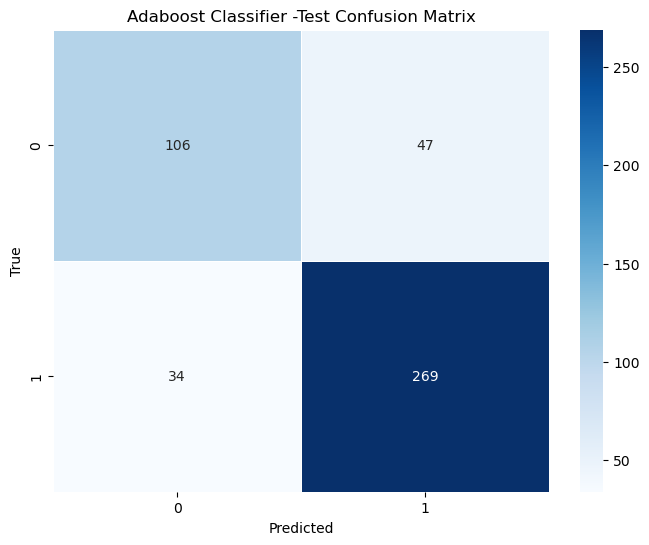

In [208]:
print(classification_report(y_test, ADB_test_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Adaboost Classifier -Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [209]:
ADB_pred_train_prob = ADB_model.predict_proba(X_train)
ADB_pred_test_prob = ADB_model.predict_proba(X_test)

ADB_auc_train = roc_auc_score(y_train,ADB_pred_train_prob[:,1])
ADB_auc_test = roc_auc_score(y_test,ADB_pred_test_prob[:,1])

AUC for the Training Data: 0.906
AUC for the Test Data: 0.880


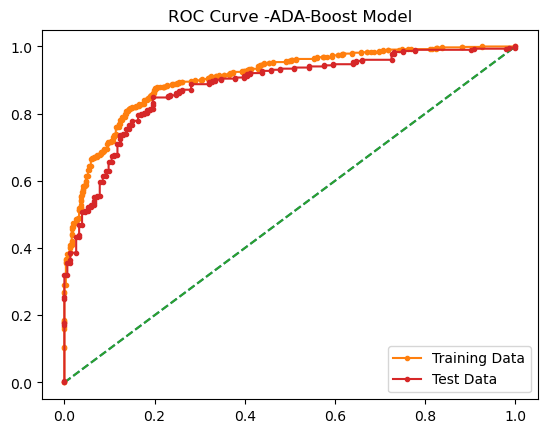

In [210]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,ADB_pred_train_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ADB_pred_train_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,ADB_pred_test_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ADB_pred_test_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve -ADA-Boost Model')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Gradient Boosting


In [211]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

### Training Performance GREDIENT BOOST


In [212]:
## Performance Matrix on train data set
gbcl_train_predict = gbcl.predict(X_train)
gbcl_train_score = gbcl.score(X_train, y_train)
gbcl_train_recall_score_Labour = recall_score(y_train,gbcl_train_predict,labels=None,pos_label = 'Labour')
gbcl_train_recall_score_Conservative = recall_score(y_train,gbcl_train_predict,labels=None,pos_label = 'Conservative')
print(gbcl_train_score,gbcl_train_recall_score_Conservative,gbcl_train_recall_score_Labour)

0.8868991517436381 0.7719869706840391 0.9336870026525199


In [213]:
y_pred = gbcl.predict(X_train)

In [214]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[237,  70],
       [ 50, 704]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.83      0.77      0.80       307
      Labour       0.91      0.93      0.92       754

    accuracy                           0.89      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.89      0.89      0.89      1061



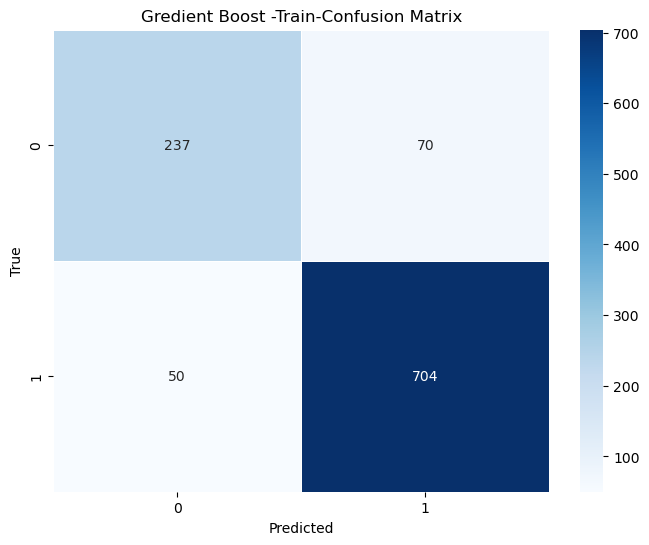

In [215]:
print(classification_report(y_train, gbcl_train_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Gredient Boost -Train-Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Test Performance GREDIENT BOOST


In [216]:
## Performance Matrix on test data set
gbcl_test_predict = gbcl.predict(X_test)
gbcl_test_score = gbcl.score(X_test, y_test)
gbcl_test_recall_score_Labour = recall_score(y_test, gbcl_test_predict,labels=None,pos_label = 'Labour')
gbcl_test_recall_score_Conservative = recall_score(y_test, gbcl_test_predict,labels=None,pos_label = 'Conservative')
print(gbcl_test_score,gbcl_test_recall_score_Conservative,gbcl_test_recall_score_Labour)

0.831140350877193 0.6862745098039216 0.9042904290429042


In [217]:
y_pred = gbcl.predict(X_test)

In [218]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[105,  48],
       [ 29, 274]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.78      0.69      0.73       153
      Labour       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



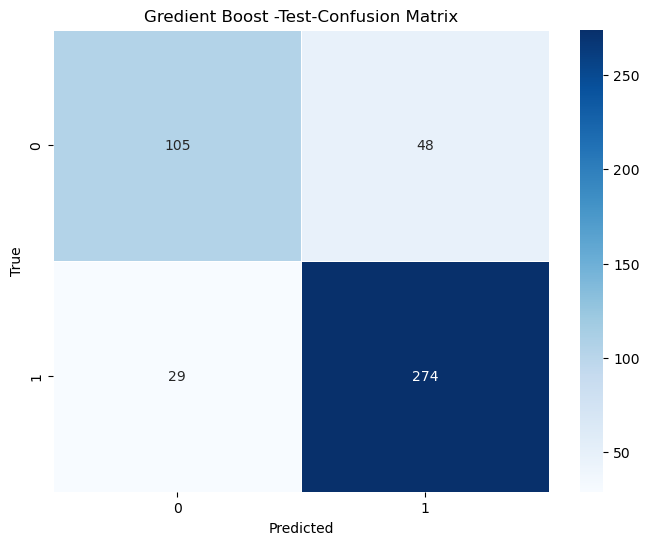

In [219]:
print(classification_report(y_test, gbcl_test_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Gredient Boost -Test-Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [220]:
gbcl_train_predict_prob = gbcl.predict_proba(X_train)
gbcl_test_predict_prob = gbcl.predict_proba(X_test)
pred_train_prob = gbcl.predict_proba(X_train)
pred_test_prob = gbcl.predict_proba(X_test)

gbcl_auc_train = roc_auc_score(y_train,gbcl_train_predict_prob[:,1])
gbcl_auc_test = roc_auc_score(y_test,gbcl_test_predict_prob[:,1])
print(gbcl_auc_train,gbcl_auc_test)

0.9458501455861895 0.8953385534631895


AUC for the Training Data: 0.946
AUC for the Test Data: 0.895


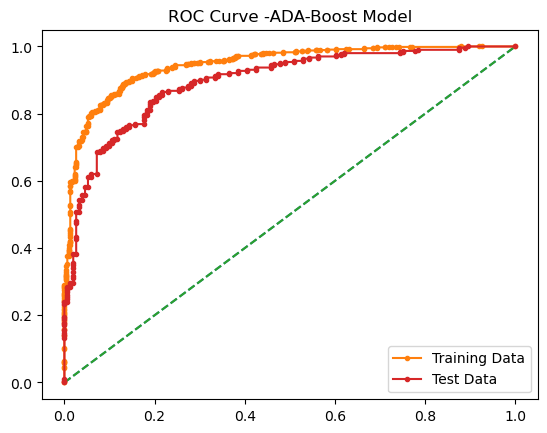

In [221]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,gbcl_train_predict_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,gbcl_train_predict_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,gbcl_test_predict_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,gbcl_test_predict_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve -ADA-Boost Model')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Decision Tree


In [222]:
from sklearn import tree

DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Training Data on Decision Tree


In [223]:
## Performance Matrix on train data set
DT_train_predict = DT_model.predict(X_train)
DT_train_score = DT_model.score(X_train, y_train)
DT_train_recall_score_Labour = recall_score(y_train,DT_train_predict,labels=None,pos_label = 'Labour')
DT_train_recall_score_Conservative = recall_score(y_train,DT_train_predict,labels=None,pos_label = 'Conservative')
print(DT_train_score,DT_train_recall_score_Conservative,DT_train_recall_score_Labour)

0.9924599434495759 1.0 0.9893899204244032


In [224]:
y_pred = DT_model.predict(X_train)

In [225]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[307,   0],
       [  8, 746]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.97      1.00      0.99       307
      Labour       1.00      0.99      0.99       754

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061



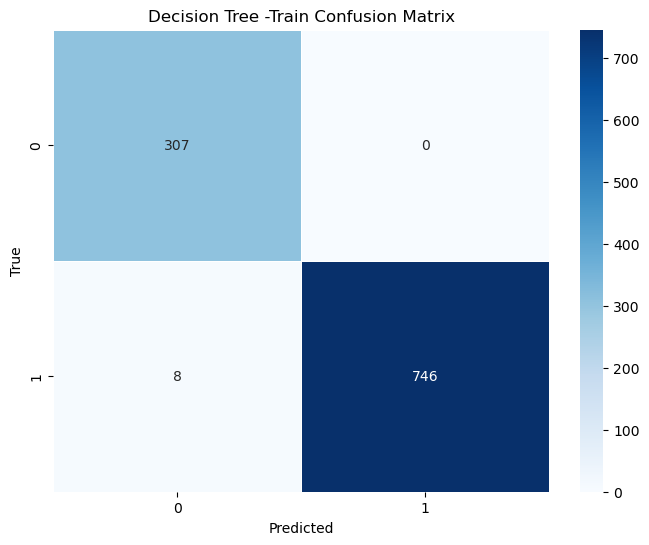

In [226]:
print(classification_report(y_train, DT_train_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Decision Tree -Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Test Performance of Decision Tree


In [227]:
## Performance Matrix on test data set
DT_test_predict = DT_model.predict(X_test)
DT_test_score = DT_model.score(X_test, y_test)
DT_test_recall_score_Labour = recall_score(y_test, DT_test_predict,labels=None,pos_label = 'Labour')
DT_test_recall_score_Conservative = recall_score(y_test, DT_test_predict,labels=None,pos_label = 'Conservative')
print(DT_test_score,DT_test_recall_score_Conservative,DT_test_recall_score_Labour)

0.7587719298245614 0.6339869281045751 0.8217821782178217


In [228]:
y_pred = DT_model.predict(X_test)

In [229]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 97,  56],
       [ 54, 249]], dtype=int64)

              precision    recall  f1-score   support

Conservative       0.64      0.63      0.64       153
      Labour       0.82      0.82      0.82       303

    accuracy                           0.76       456
   macro avg       0.73      0.73      0.73       456
weighted avg       0.76      0.76      0.76       456



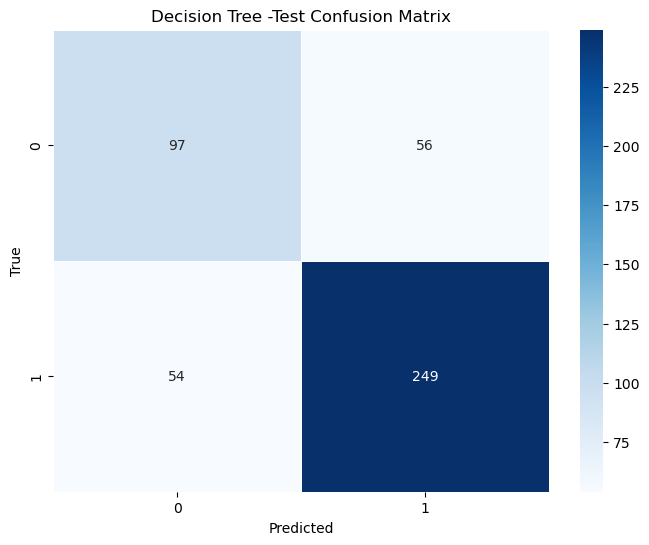

In [230]:
print(classification_report(y_test, DT_test_predict))
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Decision Tree -Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [231]:
DT_pred_train_prob = DT_model.predict_proba(X_train)
DT_pred_test_prob = DT_model.predict_proba(X_test)

DT_auc_train = roc_auc_score(y_train,DT_pred_train_prob[:,1])
DT_auc_test = roc_auc_score(y_test,DT_pred_test_prob[:,1])

AUC for the Training Data: 1.000
AUC for the Test Data: 0.730


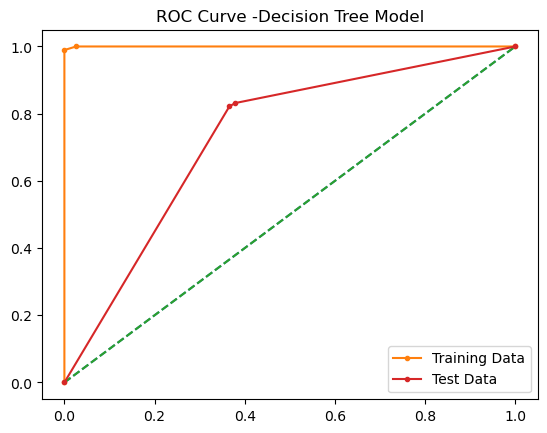

In [232]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,DT_pred_train_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,DT_pred_train_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,DT_pred_test_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,DT_pred_test_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve -Decision Tree Model')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Final Model Selection

### Compare all the model built so far - Select the final model with the proper justification - Check the most important features in the final model and draw inferences.

### Comparison of Different Models


In [233]:
model_names = ['Naive-Bayes','LDA','ADABoost',
              'GradientBoost','KNN','DecisionTree',
              'RF','Bagging']

train_recalls = [NB_train_recall_score_Labour,LDA_train_recall_score_Labour,
                ADB_train_recall_score_Labour,gbcl_train_recall_score_Labour,
                KNN_train_recall_score_Labour,DT_train_recall_score_Labour,
                RF_train_recall_score_Labour,
                 Bagging_train_recall_score_Labour]
test_recalls = [NB_test_recall_score_Labour,LDA_test_recall_score_Labour,
               ADB_test_recall_score_Labour,gbcl_test_recall_score_Labour,
               KNN_test_recall_score_Labour,DT_test_recall_score_Labour,
               RF_test_recall_score_Labour,Bagging_test_recall_score_Labour]
Accuracy_Train = [NB_train_score,LDA_train_score,
                ADB_train_score,gbcl_train_score,
                KNN_train_score,DT_train_score,
                RF_train_score,
                 Bagging_train_score]
Accuracy_Test = [NB_test_score,LDA_test_score,
                ADB_test_score,gbcl_test_score,
                KNN_test_score,DT_test_score,
                RF_test_score,
                 Bagging_test_score]

recall_df = pd.DataFrame({'Train Recall':train_recalls,
                         'Test Recall':test_recalls,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test},
                        index=model_names)
recall_df

Train Recall  Test Recall  Accuracy Train  Accuracy Test
Naive-Bayes        0.893899     0.867987        0.836004       0.820175
LDA                0.907162     0.894389        0.833176       0.837719
ADABoost           0.905836     0.887789        0.840716       0.822368
GradientBoost      0.933687     0.904290        0.886899       0.831140
KNN                0.903183     0.904290        0.842601       0.831140
DecisionTree       0.989390     0.821782        0.992460       0.758772
RF                 0.994695     0.894389        0.992460       0.809211
Bagging            0.992042     0.910891        0.961357       0.831140

### Conclusion on Model Selection
1. So as per the test data, best performing model is - Linear Discriminant Analysis

2. Best Performing models are - Decision Tree , Random Forest and Bagging



### Problem 2

### In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1. President Franklin D. Roosevelt in 1941

2. President John F. Kennedy in 1961

3. President Richard Nixon in 1973

4. Code Snippet to extract the three speeches:

"
import nltk

nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

inaugural.raw('1941-Roosevelt.txt')

inaugural.raw('1961-Kennedy.txt')

inaugural.raw('1973-Nixon.txt')
"

In [244]:
import nltk
import random
import string
import re
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [248]:
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/300.2 kB 2.4 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/300.2 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.4 MB/s eta 0:00:00


In [249]:
import re
import nltk 
from wordcloud import WordCloud
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [250]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [251]:
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  
1941-Roosevelt  On each national day of inauguration since 178...  
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...  
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...

### Problem 2 - Define the problem and Perform Exploratory Data Analysis

In [252]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  
1941-Roosevelt  On each national day of inauguration since 178...        1323  
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1364  
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769

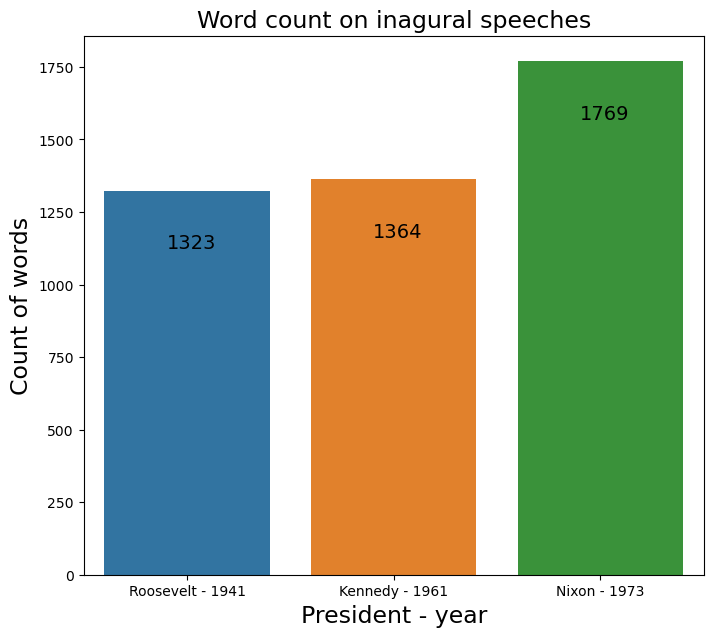

In [253]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='word_count', x='president', data=inaugural_speech)
plt.title('Word count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of words',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-200), fontsize = 14)

In [254]:
# Number of characters
inaugural_speech['char_count'] = inaugural_speech['text'].str.len()
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  On each national day of inauguration since 178...        1323   
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1364   
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769   

                char_count  
1941-Roosevelt        7571  
1961-Kennedy          7618  
1973-Nixon            9991

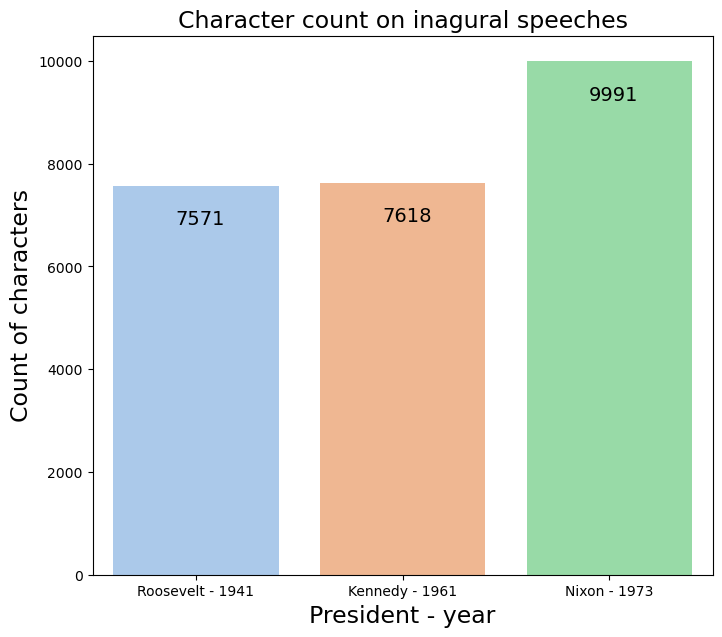

In [255]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='char_count', x='president', data=inaugural_speech, palette = 'pastel')
plt.title('Character count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of characters',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),S
                    (p.get_x()+.3,
                     p.get_height()-750), fontsize = 14)

In [257]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [258]:
# Number of sentences
from nltk.tokenize import sent_tokenize
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  On each national day of inauguration since 178...        1323   
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1364   
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769   

                char_count  sents_count  
1941-Roosevelt        7571           68  
1961-Kennedy          7618           52  
1973-Nixon            9991           68

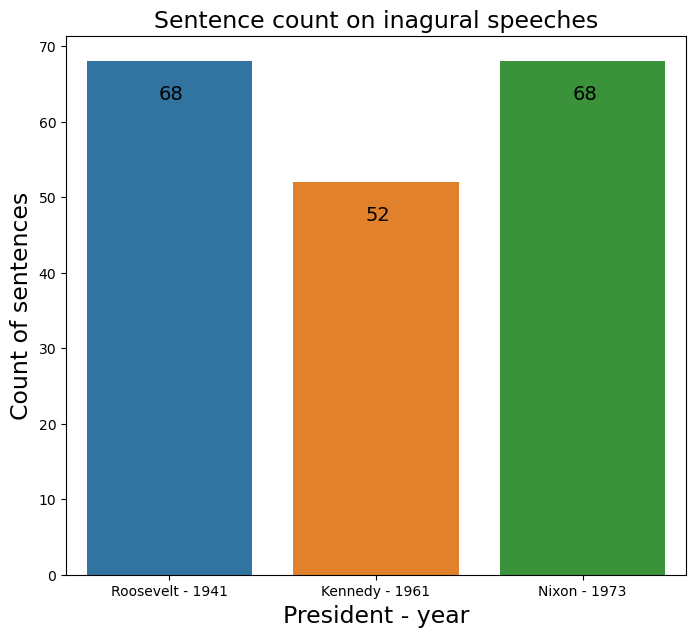

In [259]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='sents_count', x='president', data=inaugural_speech)
plt.title('Sentence count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of sentences',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.35,
                     p.get_height()-5), fontsize = 14)


### Problem 2 - Text cleaning

### Stopword removal - Stemming - find the 3 most common words used in all three speeches

In [261]:
# Lower case conversion
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

In [262]:
# Remove punctuation
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [263]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
add_to_stop_words = ['mr','on','it','the','in','let','to','us','shall']
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

In [264]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech


president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  national day inauguration since 1789 people re...        1323   
1961-Kennedy    vice president johnson speaker chief justice p...        1364   
1973-Nixon      vice president speaker chief justice senator c...        1769   

                char_count  sents_count  
1941-Roosevelt        7571           68  
1961-Kennedy          7618           52  
1973-Nixon            9991           68

In [265]:
print("Speech of president Roosevelt without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)

Speech of president Roosevelt without stopwords


['national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vi

In [266]:

print("Speech of president Kennedy without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Kennedy - 1961"].text)

Speech of president Kennedy without stopwords


['vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much p

In [267]:
print("Speech of president Nixon without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Nixon - 1973"].text)

Speech of president Nixon without stopwords


['vice president speaker chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations americas role maintaining peac

### Problem 2 - Plot Word cloud of all three speeches

### Show the most common words used in all three speeches in the form of word clouds

In [269]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:5]
freq

nation       11
know         10
spirit        9
democracy     9
life          8
dtype: int64

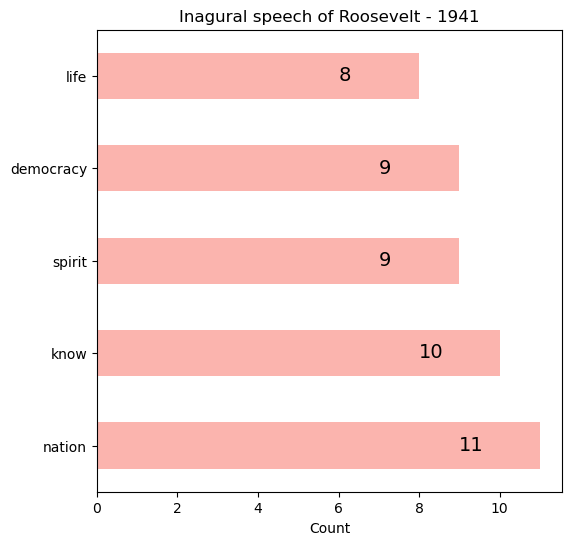

In [270]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Pastel1')
plt.title('Inagural speech of Roosevelt - 1941')
plt.xlabel('Count')
#plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

In [271]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:5]
freq

world     8
sides     8
new       7
pledge    7
power     5
dtype: int64

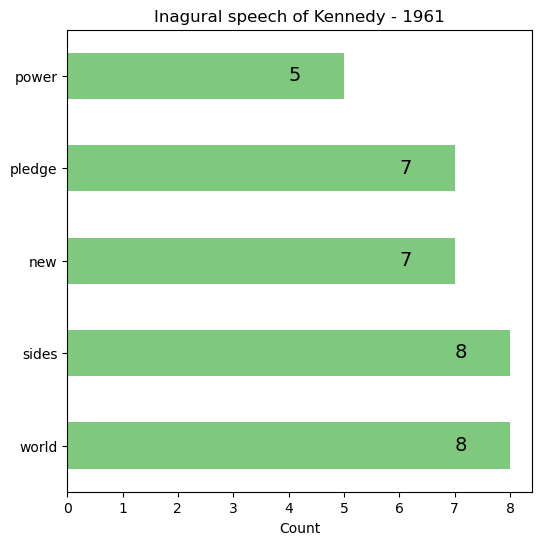

In [272]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Accent')
plt.title('Inagural speech of Kennedy - 1961')
plt.xlabel('Count')
#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-1, p.get_y()+.20), fontsize=14)

In [273]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:5]
freq

peace             19
world             16
new               15
america           13
responsibility    11
dtype: int64

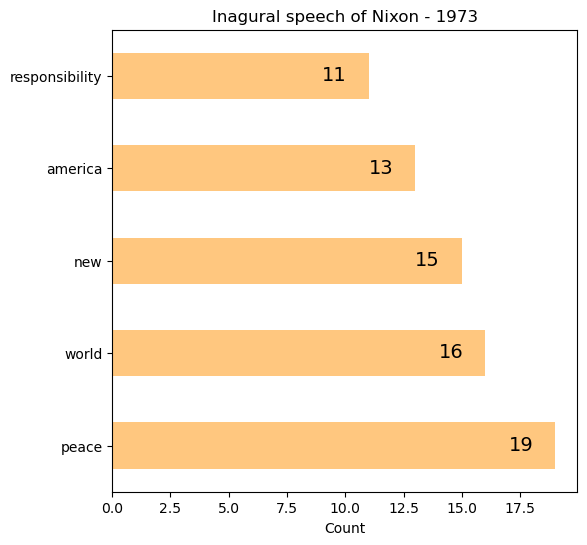

In [274]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'copper_r')
plt.title('Inagural speech of Nixon - 1973')
plt.xlabel('Count')
#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

Word Cloud for Roosewelt after cleaning


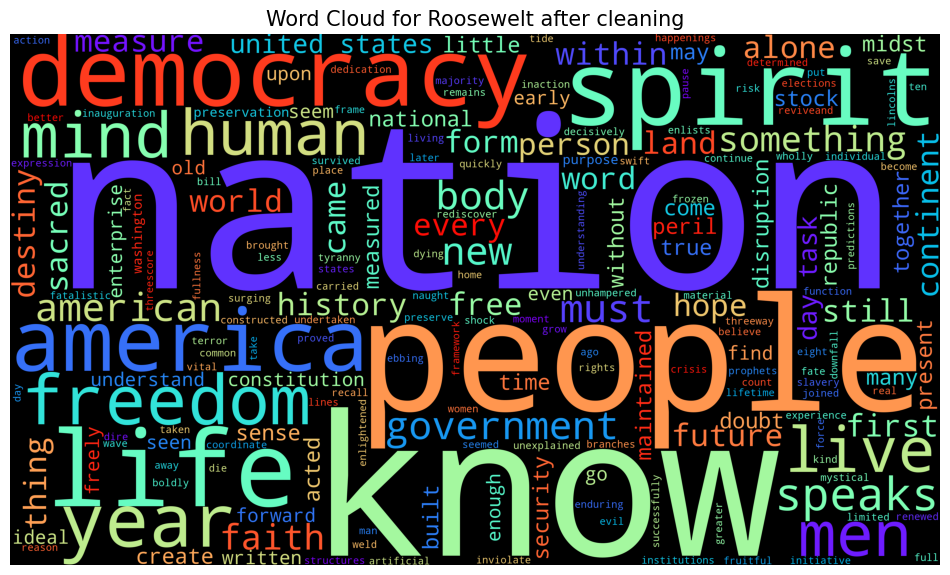

In [275]:
from wordcloud import WordCloud,STOPWORDS
#new_df=inaugural_speech.iloc[0:1,0]
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'rainbow',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Roosewelt after cleaning",fontsize=15)
print("Word Cloud for Roosewelt after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Kennedy after cleaning


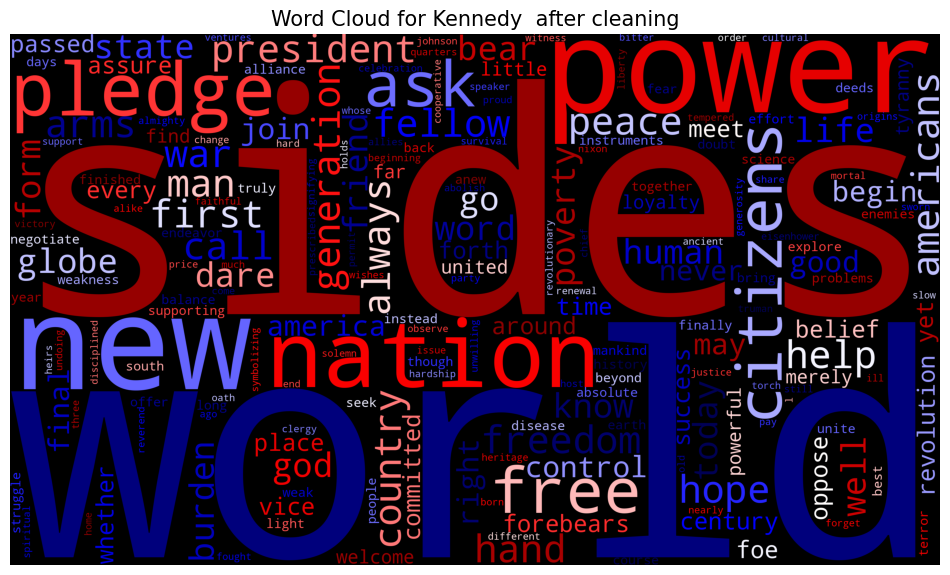

In [276]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'seismic_r',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Kennedy  after cleaning",fontsize=15)
print("Word Cloud for Kennedy after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Nixon after cleaning


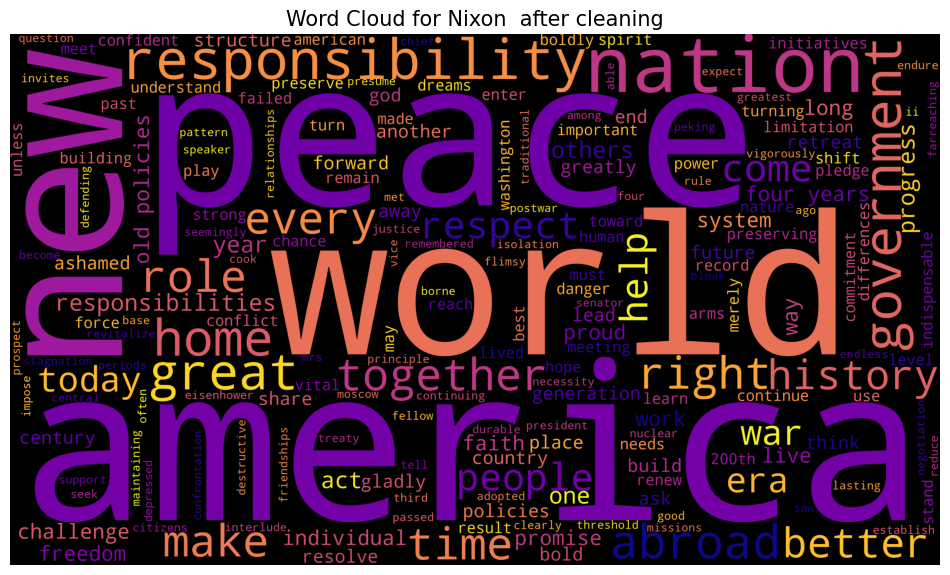

In [277]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'plasma',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Nixon  after cleaning",fontsize=15)
print("Word Cloud for Nixon after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
